In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn

print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {mpl.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")

numpy version: 1.26.0
pandas version: 1.4.2
matplotlib version: 3.8.0
scikit-learn version: 1.2.2


In [3]:
import seaborn as sb
print(f"seaborn version: {sb.__version__}")

seaborn version: 0.13.2


In [4]:
file_path = 'D:/crop yield prediction/crop prediction price prediction/crop prediction price prediction/App/Datasets/Crop_Yield.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149848 entries, 0 to 149847
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State_Name          149848 non-null  object 
 1   District_Name       149848 non-null  object 
 2   Crop_Year           149848 non-null  int64  
 3   Season              149848 non-null  object 
 4   Crop                149848 non-null  object 
 5   temperature         149848 non-null  float64
 6   humidity            149848 non-null  int64  
 7   Soil_Moisture       149848 non-null  int64  
 8   Area_in_hectares    149848 non-null  float64
 9   Production_in_tons  149848 non-null  float64
 10  Unnamed: 0          149848 non-null  int64  
 11  Crop_Type           149848 non-null  object 
 12  N                   149848 non-null  int64  
 13  P                   149848 non-null  int64  
 14  K                   149848 non-null  int64  
 15  pH                  149848 non-nul

(None,
                     State_Name District_Name  Crop_Year       Season  \
 0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
 1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
 2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
 3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
 4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
 
                   Crop  temperature  humidity  Soil_Moisture  \
 0             Arecanut         36.0        35             45   
 1  Other Kharif pulses         37.0        40             46   
 2                 Rice         36.0        41             50   
 3               Banana         37.0        42             55   
 4            Cashewnut         36.0        40             54   
 
    Area_in_hectares  Production_in_tons  Unnamed: 0 Crop_Type    N   P   K  \
 0            1254.0              2000.0           0    kharif  120  40  20   
 1 

In [5]:
data.shape

(149848, 18)

In [6]:
data.tail

<bound method NDFrame.tail of                          State_Name   District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands        NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands        NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands        NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands        NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands        NICOBARS       2000  Whole Year    
...                             ...             ...        ...          ...   
149843                  west bengal  JANJGIR-CHAMPA       2006  Rabi          
149844                  west bengal  JANJGIR-CHAMPA       2006  Rabi          
149845                  west bengal  JANJGIR-CHAMPA       2006  Rabi          
149846                  west bengal  JANJGIR-CHAMPA       2006  Rabi          
149847                  west bengal  JANJGIR-CHAMPA       2006  Rabi          

                     

In [7]:
data.describe()

,Crop_Year,temperature,humidity,Soil_Moisture,Area_in_hectares,Production_in_tons,Unnamed: 0,N,P,K,pH,rainfall,Yield_ton_per_hec
count,149848.000000,149848.000000,149848.000000,149848.000000,149848.000000,1.498480e+05,149848.000000,149848.000000,149848.000000,149848.000000,149848.000000,149848.000000,149848.000000
mean,2005.959672,29.273838,41.593622,53.703206,13435.833060,1.679367e+05,33266.119508,86.561182,41.061909,34.684580,5.582355,685.531875,3.049114
std,2.950000,5.758350,4.458938,3.066456,39314.503924,7.349437e+06,33282.940193,40.041565,12.313461,25.427615,0.421448,494.106427,27.677729
min,1997.000000,1.180000,35.000000,45.000000,0.200000,0.000000e+00,0.000000,10.000000,10.000000,10.000000,3.820000,3.274569,0.000000
25%,2006.000000,25.000000,40.000000,54.000000,106.000000,1.290000e+02,0.000000,50.000000,40.000000,20.000000,5.440000,297.660000,0.921569
50%,2006.000000,28.680000,40.000000,54.000000,747.000000,1.106000e+03,24924.500000,80.000000,40.000000,20.000000,5.460000,654.340000,1.287671
75%,2006.000000,34.666667,40.000000,54.000000,5607.000000,1.070000e+04,62386.250000,120.000000,40.000000,40.000000,5.620000,840.460000,1.919210
max,2014.000000,37.000000,55.000000,62.000000,877029.000000,7.801620e+08,99848.000000,180.000000,125.000000,200.000000,7.000000,3322.060000,9801.000000


In [8]:
data = data.drop(['Unnamed: 0','Production_in_tons'], axis=1)
data.describe()

,Crop_Year,temperature,humidity,Soil_Moisture,Area_in_hectares,N,P,K,pH,rainfall,Yield_ton_per_hec
count,149848.000000,149848.000000,149848.000000,149848.000000,149848.000000,149848.000000,149848.000000,149848.000000,149848.000000,149848.000000,149848.000000
mean,2005.959672,29.273838,41.593622,53.703206,13435.833060,86.561182,41.061909,34.684580,5.582355,685.531875,3.049114
std,2.950000,5.758350,4.458938,3.066456,39314.503924,40.041565,12.313461,25.427615,0.421448,494.106427,27.677729
min,1997.000000,1.180000,35.000000,45.000000,0.200000,10.000000,10.000000,10.000000,3.820000,3.274569,0.000000
25%,2006.000000,25.000000,40.000000,54.000000,106.000000,50.000000,40.000000,20.000000,5.440000,297.660000,0.921569
50%,2006.000000,28.680000,40.000000,54.000000,747.000000,80.000000,40.000000,20.000000,5.460000,654.340000,1.287671
75%,2006.000000,34.666667,40.000000,54.000000,5607.000000,120.000000,40.000000,40.000000,5.620000,840.460000,1.919210
max,2014.000000,37.000000,55.000000,62.000000,877029.000000,180.000000,125.000000,200.000000,7.000000,3322.060000,9801.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149848 entries, 0 to 149847
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   State_Name         149848 non-null  object 
 1   District_Name      149848 non-null  object 
 2   Crop_Year          149848 non-null  int64  
 3   Season             149848 non-null  object 
 4   Crop               149848 non-null  object 
 5   temperature        149848 non-null  float64
 6   humidity           149848 non-null  int64  
 7   Soil_Moisture      149848 non-null  int64  
 8   Area_in_hectares   149848 non-null  float64
 9   Crop_Type          149848 non-null  object 
 10  N                  149848 non-null  int64  
 11  P                  149848 non-null  int64  
 12  K                  149848 non-null  int64  
 13  pH                 149848 non-null  float64
 14  rainfall           149848 non-null  float64
 15  Yield_ton_per_hec  149848 non-null  float64
dtypes:

In [10]:
data.isnull().sum()

State_Name           0
District_Name        0
Crop_Year            0
Season               0
Crop                 0
temperature          0
humidity             0
Soil_Moisture        0
Area_in_hectares     0
Crop_Type            0
N                    0
P                    0
K                    0
pH                   0
rainfall             0
Yield_ton_per_hec    0
dtype: int64

In [11]:
data.groupby('Crop').count()

,State_Name,District_Name,Crop_Year,Season,temperature,humidity,Soil_Moisture,Area_in_hectares,Crop_Type,N,P,K,pH,rainfall,Yield_ton_per_hec
Crop,,,,,,,,,,,,,,,
Arecanut,460,460,460,460,460,460,460,460,460,460,460,460,460,460,460
Arhar/Tur,1578,1578,1578,1578,1578,1578,1578,1578,1578,1578,1578,1578,1578,1578,1578
Bajra,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512
Banana,965,965,965,965,965,965,965,965,965,965,965,965,965,965,965
Barley,610,610,610,610,610,610,610,610,610,610,610,610,610,610,610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tapioca,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134,1134
tomato,284,284,284,284,284,284,284,284,284,284,284,284,284,284,284
turmeric,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562


In [12]:
data['Area_in_hectares'].nunique()

28441

In [13]:
data.groupby(['State_Name'],sort=True)['Yield_ton_per_hec'].sum().nlargest(30)

State_Name
uttar pradesh        58618.231074
tamil nadu           54955.663198
madhya pradesh       30178.991315
karnataka            28403.245440
bihar                27242.004085
Bihar                24317.671235
gujarat              20667.182669
Assam                18836.054796
assam                18580.206067
andhra pradesh       18460.600598
maharashtra          16423.793586
west bengal          14006.582217
haryana              12936.422303
Andhra Pradesh       12397.698631
odisha               11962.904360
chhattisgarh         11667.501913
kerala               11015.942505
rajasthan            10687.949496
telangana            10405.195206
uttarakhand           5844.093420
Chhattisgarh          5175.150685
meghalaya             4272.149381
nagaland              3580.695169
manipur               3473.164250
Arunachal Pradesh     3278.410959
himachal pradesh      3202.838433
punjab                2925.450761
jharkhand             2589.707054
arunachal pradesh     2503.750300
pud

In [14]:
data.groupby(['Crop','State_Name'],sort=True)['Yield_ton_per_hec'].sum().nlargest(10)

Crop        State_Name    
potato      uttar pradesh     20342.014441
banana      tamil nadu        15326.800166
onion       uttar pradesh     14414.360427
tapioca     tamil nadu        11888.395635
cashewnuts  tamil nadu         9916.863689
banana      gujarat            8128.532624
maize       maharashtra        7945.838949
onion       madhya pradesh     7620.149973
potato      madhya pradesh     6239.600722
banana      chhattisgarh       5935.378240
Name: Yield_ton_per_hec, dtype: float64

In [15]:
import matplotlib.pyplot as plt

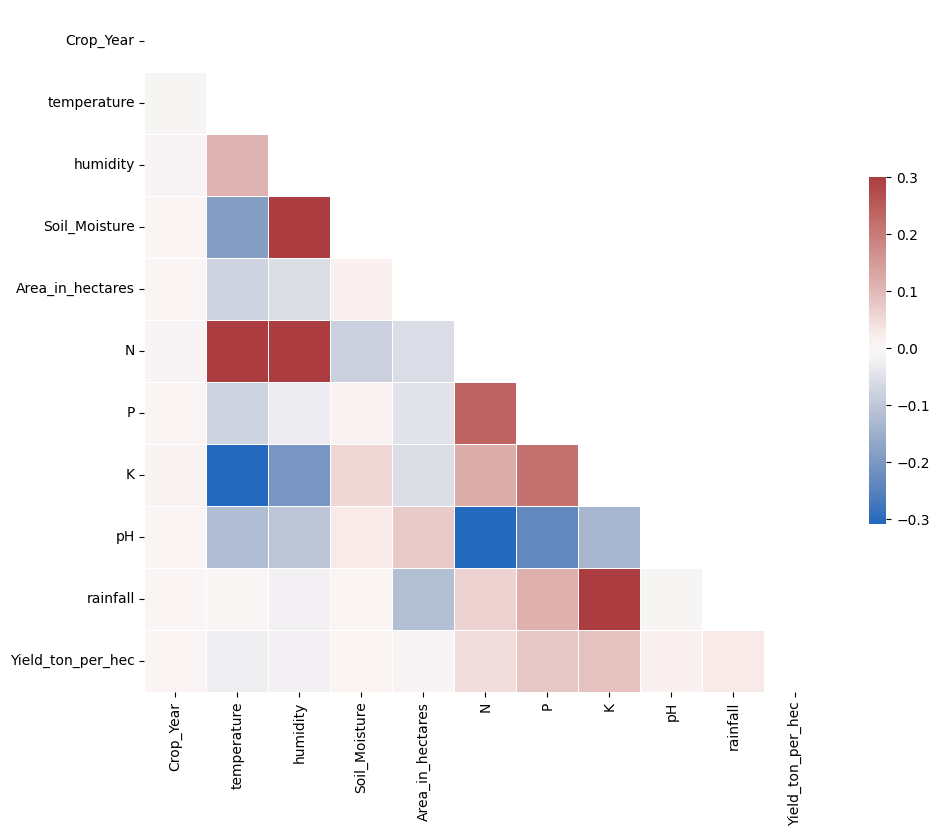

In [16]:
correlation_data=data.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [17]:
print('''Encoding Categorical Variables:
There are two categorical columns in the dataframe, categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set, like in this case, items and countries values. Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

This means that categorical data must be converted to a numerical form. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. For that purpose, One-Hot Encoding will be used to convert these two columns to one-hot numeric array.

The categorical value represents the numerical value of the entry in the dataset. This encoding will create a binary column for each category and returns a matrix with the results.''')

Encoding Categorical Variables:
There are two categorical columns in the dataframe, categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set, like in this case, items and countries values. Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

This means that categorical data must be converted to a numerical form. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. For that purpose, One-Hot Encoding will be used to convert these two columns to one-hot numeric array.

The categorical value represents the numerical value of the entry in the dataset. This encoding will create a binary column for each category and returns a matrix with the results.


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor  # For regression tasks
from sklearn.ensemble import GradientBoostingClassifier  # For classification tasks
from sklearn.linear_model import LinearRegression

In [34]:


# Define features (X) and target (y)
X = data.drop(columns=['Yield_ton_per_hec'])
y = data['Yield_ton_per_hec']

# Separate categorical and numerical columns
categorical_cols = ['State_Name', 'District_Name', 'Season', 'Crop', 'Crop_Type']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_categorical = encoder.fit_transform(X[categorical_cols])

# Scale numerical columns
scaler = StandardScaler()
X_numerical = scaler.fit_transform(X[numerical_cols])

# Combine processed numerical and categorical data
X_processed = np.hstack((X_numerical, X_categorical))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize models
gbr = GradientBoostingRegressor(random_state=42)
lr = LinearRegression()

# Train models
gbr.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Predict on test set
y_pred_gbr = gbr.predict(X_test)
y_pred_lr = lr.predict(X_test)


In [35]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

In [36]:

# Calculate metrics
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
print(rmse_gbr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(rmse_lr)

rae_gbr = np.sum(np.abs(y_test - y_pred_gbr)) / np.sum(np.abs(y_test - y_test.mean()))
print(rae_gbr)
rae_lr = np.sum(np.abs(y_test - y_pred_lr)) / np.sum(np.abs(y_test - y_test.mean()))
print(rae_lr)
rmse_gbr, rmse_lr, rae_gbr, rae_lr


58.37196633868943
58.43643834878633
0.4097042819752436
0.5458124401441474


(58.37196633868943, 58.43643834878633, 0.4097042819752436, 0.5458124401441474)

In [37]:
# Limit the number of unique categories for encoding
top_categories = {col: X[col].value_counts().index[:10].tolist() for col in categorical_cols}

# Replace less frequent categories with 'Other'
for col in categorical_cols:
    X[col] = X[col].apply(lambda x: x if x in top_categories[col] else 'Other')

# Re-encode categorical columns
X_categorical_reduced = encoder.fit_transform(X[categorical_cols])

# Combine reduced processed data
X_processed_reduced = np.hstack((X_numerical, X_categorical_reduced))

# Retry train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X_processed_reduced, y, test_size=0.2, random_state=42)

# Train models
gbr.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Predict and calculate metrics
y_pred_gbr = gbr.predict(X_test)
y_pred_lr = lr.predict(X_test)

rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

rae_gbr = np.sum(np.abs(y_test - y_pred_gbr)) / np.sum(np.abs(y_test - y_test.mean()))
rae_lr = np.sum(np.abs(y_test - y_pred_lr)) / np.sum(np.abs(y_test - y_test.mean()))

rmse_gbr, rmse_lr, rae_gbr, rae_lr


(58.35534863817906, 58.47625524528178, 0.43571156021324825, 0.6609266377235483)

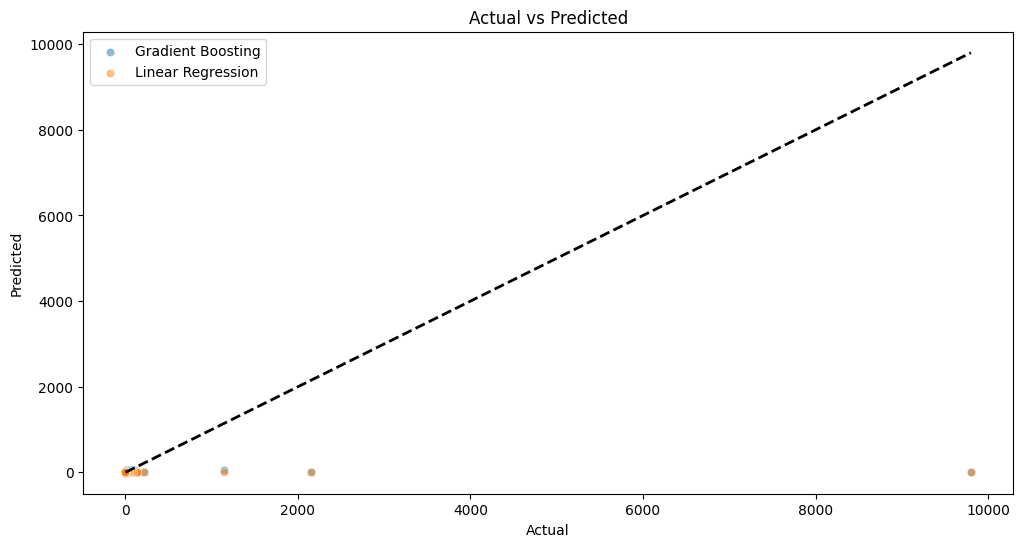

In [39]:
plt.figure(figsize=(12, 6))
sb.scatterplot(x=y_test, y=y_pred_gbr, label='Gradient Boosting', alpha=0.5)
sb.scatterplot(x=y_test, y=y_pred_lr, label='Linear Regression', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

In [41]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
from sklearn.preprocessing import LabelEncoder

In [47]:
categorical_cols = ['State_Name', 'District_Name', 'Season', 'Crop', 'Crop_Type']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Encode categorical features using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le  # Save encoder for potential reverse transformations

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
# Step 4: Prepare LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_cols)
test_data = lgb.Dataset(X_test, label=y_test, categorical_feature=categorical_cols)


Training LightGBM model...
Making predictions...
RMSE: 58.248
MAE: 1.217
Plotting feature importance...


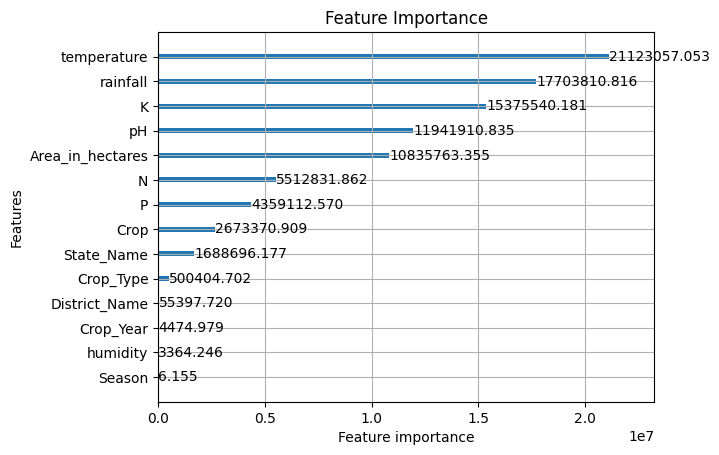

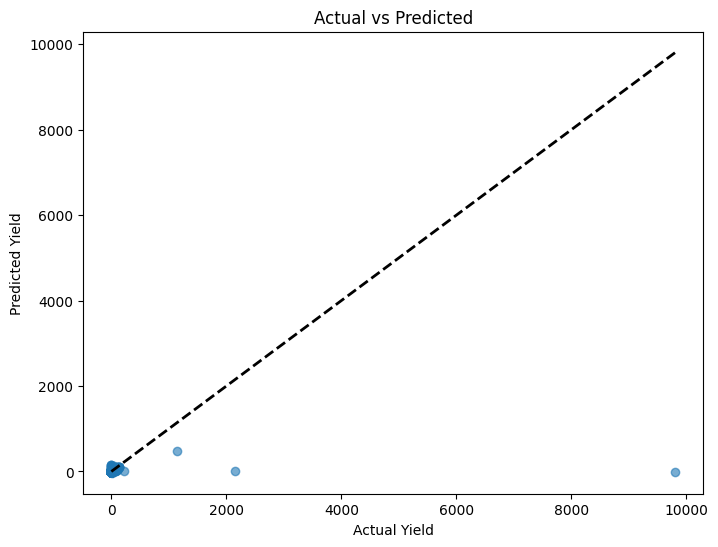

In [53]:
# Step 5: Define LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'verbosity': -1
}
# Step 6: Train the model
print("Training LightGBM model...")
lgb_model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],
    num_boost_round=1000,
)

# Step 7: Predictions
print("Making predictions...")
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# Step 8: Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Step 9: Feature Importance
print("Plotting feature importance...")
lgb.plot_importance(lgb_model, max_num_features=20, importance_type='gain')
plt.title("Feature Importance")
plt.show()

# Step 10: Visualize Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted')
plt.show()

In [54]:
# Drop specified columns
columns_to_drop = ['Crop_Year', 'Crop', 'District_Name', 'Humidity', 'Season']
data = data.drop(columns=columns_to_drop, errors='ignore')  # 'errors="ignore"' skips columns not found

# Display the first few rows of the updated dataset
print(data.head())

                    State_Name  temperature  humidity  Soil_Moisture  \
0  Andaman and Nicobar Islands         36.0        35             45   
1  Andaman and Nicobar Islands         37.0        40             46   
2  Andaman and Nicobar Islands         36.0        41             50   
3  Andaman and Nicobar Islands         37.0        42             55   
4  Andaman and Nicobar Islands         36.0        40             54   

   Area_in_hectares Crop_Type    N   P   K    pH  rainfall  Yield_ton_per_hec  
0            1254.0    kharif  120  40  20  5.46    654.34           1.287671  
1               2.0    kharif  120  40  20  5.46    654.34           1.287671  
2             102.0    kharif  120  40  20  5.46    654.34           1.287671  
3             176.0    kharif  120  40  20  5.46    654.34           1.287671  
4             720.0    kharif  120  40  20  5.46    654.34           1.287671  


Training Random Forest Regressor...
Making predictions...
Random Forest RMSE: 58.114
Random Forest MAE: 1.105


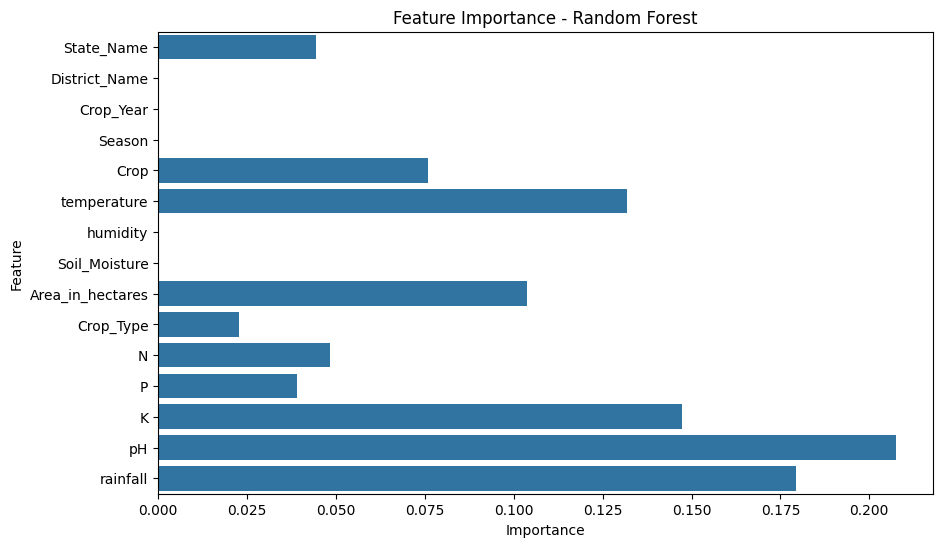

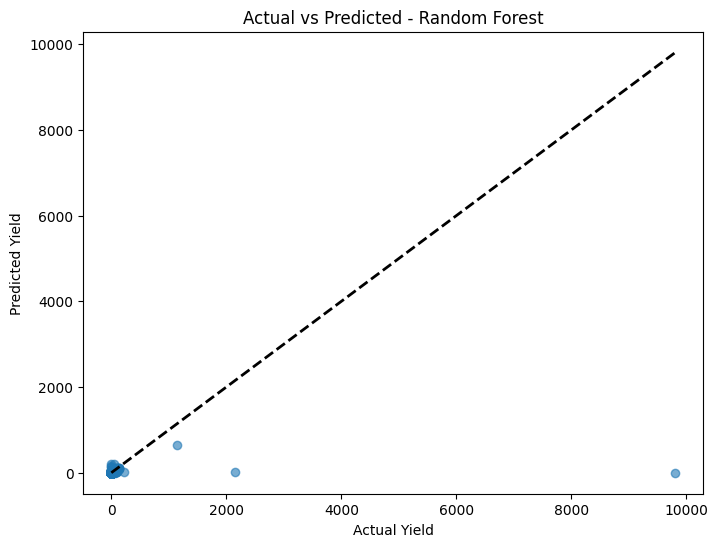

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
print("Training Random Forest Regressor...")
rf.fit(X_train, y_train)

# Step 5: Predictions
print("Making predictions...")
y_pred = rf.predict(X_test)

# Step 6: Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
mae_rf = mean_absolute_error(y_test, y_pred)

print(f"Random Forest RMSE: {rmse_rf:.3f}")
print(f"Random Forest MAE: {mae_rf:.3f}")

# Step 7: Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance
feature_importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Step 8: Visualize Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted - Random Forest')
plt.show()

In [60]:
import tensorflow as f
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [61]:

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Data Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Build and train the Neural Network model
model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=0  # Set to 1 to see progress
)

# Step 7: Predictions and Evaluation Metrics
y_pred_nn = model.predict(X_test_scaled).flatten()

# Calculate RMSE
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
print(f"Neural Network RMSE: {rmse_nn:.3f}")

# Calculate RAE
rae_nn = np.sum(np.abs(y_test - y_pred_nn)) / np.sum(np.abs(y_test - np.mean(y_test)))
print(f"Neural Network RAE: {rae_nn:.3f}")


937/937 [==============================] - 1s 581us/step
Neural Network RMSE: 58.372
Neural Network RAE: 0.352


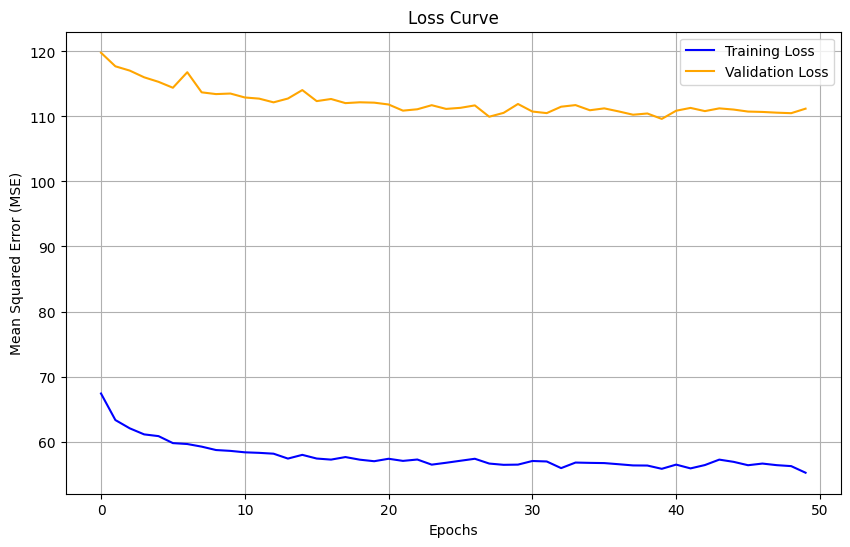

C:\Users\tanma\AppData\Local\Temp\ipykernel_388564\4084543603.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


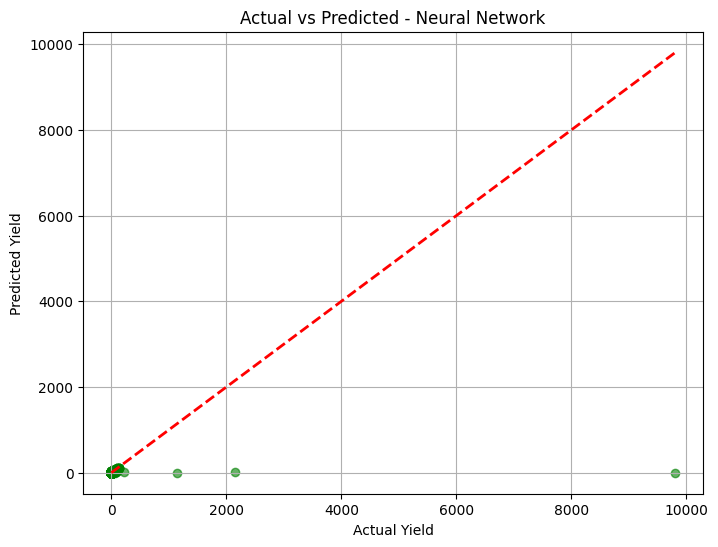

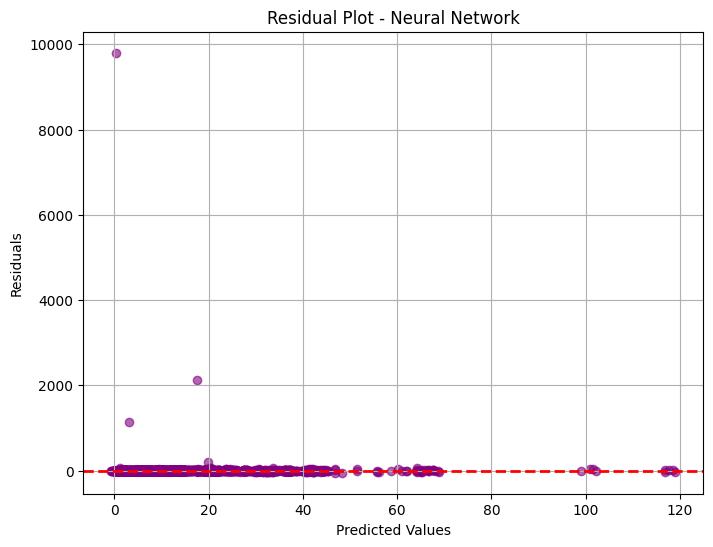

In [62]:
# Step 1: Plot Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Step 2: Actual vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted - Neural Network')
plt.grid(True)
plt.show()

# Step 3: Residual Plot (Optional for Insights)
residuals = y_test - y_pred_nn
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_nn, residuals, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Neural Network')
plt.grid(True)
plt.show()

In [1]:
pip install pytorch-tabnet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
pip uninstall pytorch-tabular -y

Found existing installation: pytorch-tabular 1.1.1
Uninstalling pytorch-tabular-1.1.1:
  Successfully uninstalled pytorch-tabular-1.1.1
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install pytorch-tabular --upgrade

  Using cached pytorch_tabular-1.1.1-py2.py3-none-any.whl.metadata (24 kB)
Using cached pytorch_tabular-1.1.1-py2.py3-none-any.whl (163 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


XGBoost RMSE: 54.844
XGBoost MAE: 0.717
XGBoost RAE: 0.194


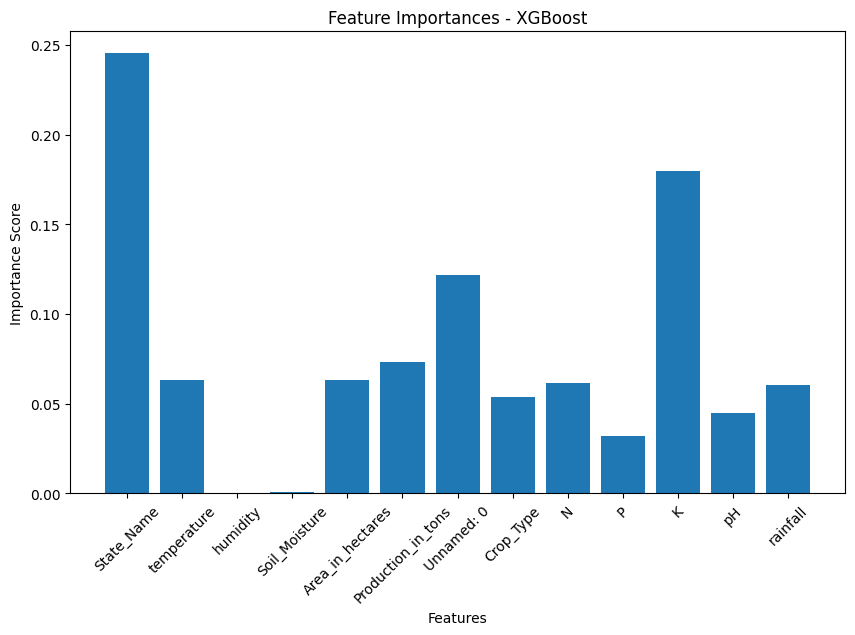

C:\Users\tanma\AppData\Local\Temp\ipykernel_362408\611406190.py:66: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


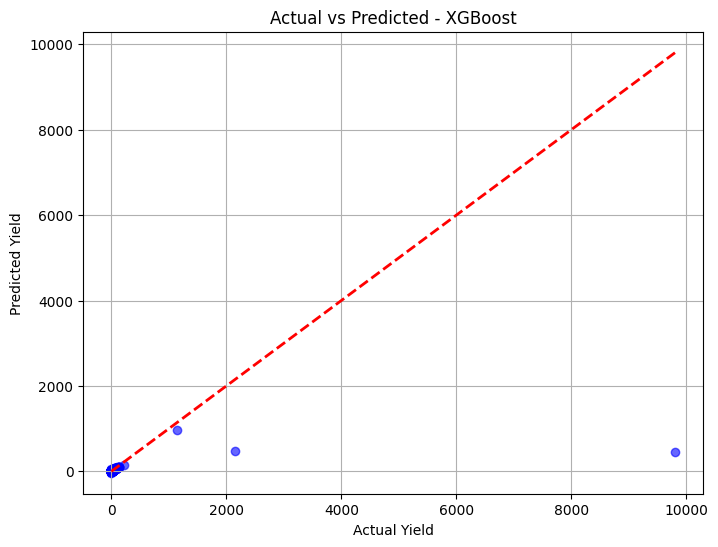

In [37]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Step 2: Drop unnecessary columns
columns_to_drop = ['Crop_Year', 'Crop', 'District_Name', 'Humidity']
data = data.drop(columns=columns_to_drop, errors='ignore')


label_encoders = {}
for col in ['State_Name', 'Crop_Type']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le 
# Step 3: Define features (X) and target (y)
X = data.drop(columns=['Yield_ton_per_hec'])  # Replace with your target column name
y = data['Yield_ton_per_hec']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the XGBoost model
xgb_model = XGBRegressor(
    n_estimators=200,  # Number of trees
    learning_rate=0.1,  # Learning rate
    max_depth=6,  # Maximum depth of a tree
    subsample=0.8,  # Subsample ratio of the training data
    colsample_bytree=0.8,  # Subsample ratio of columns when constructing each tree
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Step 6: Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Step 7: Evaluation Metrics
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rae_xgb = np.sum(np.abs(y_test - y_pred_xgb)) / np.sum(np.abs(y_test - np.mean(y_test)))

print(f"XGBoost RMSE: {rmse_xgb:.3f}")
print(f"XGBoost MAE: {mae_xgb:.3f}")
print(f"XGBoost RAE: {rae_xgb:.3f}")

# Step 8: Feature Importance Plot
feature_importances = xgb_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances)
plt.xticks(rotation=45)
plt.title('Feature Importances - XGBoost')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

# Step 9: Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted - XGBoost')
plt.grid(True)
plt.show()


In [6]:
import pandas as pd

file_path = 'D:/crop yield prediction/crop prediction price prediction/crop prediction price prediction/App/Datasets/Crop_Yield.csv'
data = pd.read_csv(file_path)
columns_to_drop = ['Crop_Year', 'District_Name', 'humidity','Unnamed: 0']
data = data.drop(columns=columns_to_drop, errors='ignore')
data.describe()


,temperature,Soil_Moisture,Area_in_hectares,Production_in_tons,N,P,K,pH,rainfall,Yield_ton_per_hec
count,149848.000000,149848.000000,149848.000000,1.498480e+05,149848.000000,149848.000000,149848.000000,149848.000000,149848.000000,149848.000000
mean,29.273838,53.703206,13435.833060,1.679367e+05,86.561182,41.061909,34.684580,5.582355,685.531875,3.049114
std,5.758350,3.066456,39314.503924,7.349437e+06,40.041565,12.313461,25.427615,0.421448,494.106427,27.677729
min,1.180000,45.000000,0.200000,0.000000e+00,10.000000,10.000000,10.000000,3.820000,3.274569,0.000000
25%,25.000000,54.000000,106.000000,1.290000e+02,50.000000,40.000000,20.000000,5.440000,297.660000,0.921569
50%,28.680000,54.000000,747.000000,1.106000e+03,80.000000,40.000000,20.000000,5.460000,654.340000,1.287671
75%,34.666667,54.000000,5607.000000,1.070000e+04,120.000000,40.000000,40.000000,5.620000,840.460000,1.919210
max,37.000000,62.000000,877029.000000,7.801620e+08,180.000000,125.000000,200.000000,7.000000,3322.060000,9801.000000


In [7]:
"Training Model on XGBoost as the RMSE and MAE are less compared to Other Algorithm"

'Training Model on XGBoost as the RMSE and MAE are less compared to Other Algorithm'

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
file_path = 'D:/crop yield prediction/crop prediction price prediction/crop prediction price prediction/App/Datasets/Crop_Yield.csv'
df = pd.read_csv(file_path)


columns_to_drop = ['Crop_Year', 'District_Name', 'humidity','Unnamed: 0']
df = df.drop(columns=columns_to_drop, errors='ignore')
df.describe()


,temperature,Soil_Moisture,Area_in_hectares,Production_in_tons,N,P,K,pH,rainfall,Yield_ton_per_hec
count,149848.000000,149848.000000,149848.000000,1.498480e+05,149848.000000,149848.000000,149848.000000,149848.000000,149848.000000,149848.000000
mean,29.273838,53.703206,13435.833060,1.679367e+05,86.561182,41.061909,34.684580,5.582355,685.531875,3.049114
std,5.758350,3.066456,39314.503924,7.349437e+06,40.041565,12.313461,25.427615,0.421448,494.106427,27.677729
min,1.180000,45.000000,0.200000,0.000000e+00,10.000000,10.000000,10.000000,3.820000,3.274569,0.000000
25%,25.000000,54.000000,106.000000,1.290000e+02,50.000000,40.000000,20.000000,5.440000,297.660000,0.921569
50%,28.680000,54.000000,747.000000,1.106000e+03,80.000000,40.000000,20.000000,5.460000,654.340000,1.287671
75%,34.666667,54.000000,5607.000000,1.070000e+04,120.000000,40.000000,40.000000,5.620000,840.460000,1.919210
max,37.000000,62.000000,877029.000000,7.801620e+08,180.000000,125.000000,200.000000,7.000000,3322.060000,9801.000000


In [25]:
check_data_quality(df)
def check_data_quality(df):
    """
    Check for missing values, duplicates, and basic statistics
    """
    print("\n=== DATA QUALITY ASSESSMENT ===")
    
    # Check for missing values
    print("\nMissing Values:")
    missing_values = df.isnull().sum()
    print(missing_values)
    
    # Check for duplicates
    duplicates = df.duplicated().sum()
    print(f"\nDuplicate rows: {duplicates}")
    
    # Basic statistics
    print("\nBasic Statistics:")
    print(df.describe())
    
    return missing_values, duplicates


=== DATA QUALITY ASSESSMENT ===

Missing Values:
State_Name            0
Season                0
Crop                  0
temperature           0
Soil_Moisture         0
Area_in_hectares      0
Production_in_tons    0
Crop_Type             0
N                     0
P                     0
K                     0
pH                    0
rainfall              0
Yield_ton_per_hec     0
dtype: int64

Duplicate rows: 866

Basic Statistics:
         temperature  Soil_Moisture  Area_in_hectares  Production_in_tons  \
count  149848.000000  149848.000000     149848.000000        1.498480e+05   
mean       29.273838      53.703206      13435.833060        1.679367e+05   
std         5.758350       3.066456      39314.503924        7.349437e+06   
min         1.180000      45.000000          0.200000        0.000000e+00   
25%        25.000000      54.000000        106.000000        1.290000e+02   
50%        28.680000      54.000000        747.000000        1.106000e+03   
75%        34.666667  

In [26]:
check_data_quality(df)
def check_data_quality(df):
    """
    Check for missing values, duplicates, and basic statistics
    """
    print("\n=== DATA QUALITY ASSESSMENT ===")
    
    # Check for missing values
    print("\nMissing Values:")
    missing_values = df.isnull().sum()
    print(missing_values)
    
    # Check for duplicates
    duplicates = df.duplicated().sum()
    print(f"\nDuplicate rows: {duplicates}")
    
    # Basic statistics
    print("\nBasic Statistics:")
    print(df.describe())
    
    return missing_values, duplicates


=== DATA QUALITY ASSESSMENT ===

Missing Values:
State_Name            0
Season                0
Crop                  0
temperature           0
Soil_Moisture         0
Area_in_hectares      0
Production_in_tons    0
Crop_Type             0
N                     0
P                     0
K                     0
pH                    0
rainfall              0
Yield_ton_per_hec     0
dtype: int64

Duplicate rows: 866

Basic Statistics:
         temperature  Soil_Moisture  Area_in_hectares  Production_in_tons  \
count  149848.000000  149848.000000     149848.000000        1.498480e+05   
mean       29.273838      53.703206      13435.833060        1.679367e+05   
std         5.758350       3.066456      39314.503924        7.349437e+06   
min         1.180000      45.000000          0.200000        0.000000e+00   
25%        25.000000      54.000000        106.000000        1.290000e+02   
50%        28.680000      54.000000        747.000000        1.106000e+03   
75%        34.666667  

In [30]:
handle_missing_values(df)
def handle_missing_values(df):
    """
    Handle missing values in the dataset
    """
    print("\n=== HANDLING MISSING VALUES ===")
    
    # For numerical columns, fill with median
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    for col in numerical_cols:
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Filled {col} missing values with median: {median_val}")
    
    # For categorical columns, fill with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
            print(f"Filled {col} missing values with mode: {mode_val}")
    
    return df

df = handle_missing_values(df)


=== HANDLING MISSING VALUES ===

=== HANDLING MISSING VALUES ===


In [32]:

def remove_duplicates(df):
    """
    Remove duplicate rows
    """
    print("\n=== REMOVING DUPLICATES ===")
    initial_shape = df.shape
    df = df.drop_duplicates()
    final_shape = df.shape
    
    print(f"Removed {initial_shape[0] - final_shape[0]} duplicate rows")
    print(f"Dataset shape: {initial_shape} -> {final_shape}")
    
    return df
df = remove_duplicates(df)
df.describe(


=== REMOVING DUPLICATES ===
Removed 866 duplicate rows
Dataset shape: (149848, 14) -> (148982, 14)


,temperature,Soil_Moisture,Area_in_hectares,Production_in_tons,N,P,K,pH,rainfall,Yield_ton_per_hec
count,148982.000000,148982.000000,148982.000000,1.489820e+05,148982.000000,148982.000000,148982.000000,148982.000000,148982.000000,148982.000000
mean,29.243245,53.706622,13513.626246,1.689120e+05,86.366809,41.068082,34.769939,5.583067,685.713186,3.059353
std,5.755028,3.048782,39415.317646,7.370755e+06,40.076294,12.348930,25.476680,0.422568,495.534683,27.757728
min,1.180000,45.000000,0.200000,0.000000e+00,10.000000,10.000000,10.000000,3.820000,3.274569,0.000000
25%,25.000000,54.000000,110.000000,1.330000e+02,50.000000,40.000000,20.000000,5.440000,297.660000,0.914522
50%,28.657273,54.000000,762.000000,1.132000e+03,80.000000,40.000000,20.000000,5.460000,654.340000,1.287671
75%,34.010000,54.000000,5688.750000,1.087175e+04,120.000000,40.000000,40.000000,5.620000,884.500000,1.933333
max,37.000000,62.000000,877029.000000,7.801620e+08,180.000000,125.000000,200.000000,7.000000,3322.060000,9801.000000


In [33]:
def validate_data_types(df):
    """
    Ensure proper data types for each column
    """
    print("\n=== VALIDATING DATA TYPES ===")
    
    # Expected numerical columns
    numerical_cols = ['temperature', 'Soil_Moisture', 'Area_in_hectares', 
                     'Production_in_tons', 'N', 'P', 'K', 'pH', 'rainfall', 
                     'Yield_ton_per_hec']
    
    for col in numerical_cols:
        if col in df.columns:
            # Convert to numeric, handling any non-numeric values
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"Converted {col} to numeric type")
    
    print("\nFinal data types:")
    print(df.dtypes)
    
    return df
df=validate_data_types(df)
df.describe()


=== VALIDATING DATA TYPES ===
Converted temperature to numeric type
Converted Soil_Moisture to numeric type
Converted Area_in_hectares to numeric type
Converted Production_in_tons to numeric type
Converted N to numeric type
Converted P to numeric type
Converted K to numeric type
Converted pH to numeric type
Converted rainfall to numeric type
Converted Yield_ton_per_hec to numeric type

Final data types:
State_Name             object
Season                 object
Crop                   object
temperature           float64
Soil_Moisture           int64
Area_in_hectares      float64
Production_in_tons    float64
Crop_Type              object
N                       int64
P                       int64
K                       int64
pH                    float64
rainfall              float64
Yield_ton_per_hec     float64
dtype: object


,temperature,Soil_Moisture,Area_in_hectares,Production_in_tons,N,P,K,pH,rainfall,Yield_ton_per_hec
count,148982.000000,148982.000000,148982.000000,1.489820e+05,148982.000000,148982.000000,148982.000000,148982.000000,148982.000000,148982.000000
mean,29.243245,53.706622,13513.626246,1.689120e+05,86.366809,41.068082,34.769939,5.583067,685.713186,3.059353
std,5.755028,3.048782,39415.317646,7.370755e+06,40.076294,12.348930,25.476680,0.422568,495.534683,27.757728
min,1.180000,45.000000,0.200000,0.000000e+00,10.000000,10.000000,10.000000,3.820000,3.274569,0.000000
25%,25.000000,54.000000,110.000000,1.330000e+02,50.000000,40.000000,20.000000,5.440000,297.660000,0.914522
50%,28.657273,54.000000,762.000000,1.132000e+03,80.000000,40.000000,20.000000,5.460000,654.340000,1.287671
75%,34.010000,54.000000,5688.750000,1.087175e+04,120.000000,40.000000,40.000000,5.620000,884.500000,1.933333
max,37.000000,62.000000,877029.000000,7.801620e+08,180.000000,125.000000,200.000000,7.000000,3322.060000,9801.000000


In [34]:
def check_data_consistency(df):
    """
    Check for logical inconsistencies in the data
    """
    print("\n=== CHECKING DATA CONSISTENCY ===")
    
    # Check for negative values where they shouldn't exist
    cols_to_check = ['Area_in_hectares', 'Production_in_tons', 'N', 'P', 'K', 
                     'rainfall', 'Yield_ton_per_hec']
    
    for col in cols_to_check:
        if col in df.columns:
            negative_count = (df[col] < 0).sum()
            if negative_count > 0:
                print(f"Warning: {col} has {negative_count} negative values")
                # Replace negative values with 0 or median based on context
                if col in ['N', 'P', 'K']:
                    df.loc[df[col] < 0, col] = 0
                else:
                    df.loc[df[col] < 0, col] = df[col].median()
    
    # Check pH range (should be between 0-14)
    if 'pH' in df.columns:
        invalid_ph = ((df['pH'] < 0) | (df['pH'] > 14)).sum()
        if invalid_ph > 0:
            print(f"Warning: pH has {invalid_ph} values outside normal range (0-14)")
            df.loc[(df['pH'] < 0) | (df['pH'] > 14), 'pH'] = df['pH'].median()
    
    return df
df=check_data_consistency(df)


=== CHECKING DATA CONSISTENCY ===


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


def load_and_clean_data(file_path):
    """
    Load and perform initial data cleaning
    """
    # Load the dataset
    df = pd.read_csv(file_path)
    columns_to_drop = ['Crop_Year', 'District_Name', 'humidity','Unnamed: 0','Season','State_Name']
    df = df.drop(columns=columns_to_drop, errors='ignore')
    
    print("Dataset Shape:", df.shape)
    print("\nDataset Info:")
    print(df.info())
    
    print("\nFirst 5 rows:")
    print(df.head())
    
    return df

def check_data_quality(df):
    """
    Check for missing values, duplicates, and basic statistics
    """
    print("\n=== DATA QUALITY ASSESSMENT ===")
    
    # Check for missing values
    print("\nMissing Values:")
    missing_values = df.isnull().sum()
    print(missing_values)
    
    # Check for duplicates
    duplicates = df.duplicated().sum()
    print(f"\nDuplicate rows: {duplicates}")
    
    # Basic statistics
    print("\nBasic Statistics:")
    print(df.describe())
    
    return missing_values, duplicates

def handle_missing_values(df):
    """
    Handle missing values in the dataset
    """
    print("\n=== HANDLING MISSING VALUES ===")
    
    # For numerical columns, fill with median
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    for col in numerical_cols:
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Filled {col} missing values with median: {median_val}")
    
    # For categorical columns, fill with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    for col in categorical_cols:
        if df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
            print(f"Filled {col} missing values with mode: {mode_val}")
    
    return df

def remove_duplicates(df):
    """
    Remove duplicate rows
    """
    print("\n=== REMOVING DUPLICATES ===")
    initial_shape = df.shape
    df = df.drop_duplicates()
    final_shape = df.shape
    
    print(f"Removed {initial_shape[0] - final_shape[0]} duplicate rows")
    print(f"Dataset shape: {initial_shape} -> {final_shape}")
    
    return df

def validate_data_types(df):
    """
    Ensure proper data types for each column
    """
    print("\n=== VALIDATING DATA TYPES ===")
    
    # Expected numerical columns
    numerical_cols = ['temperature', 'Soil_Moisture', 'Area_in_hectares', 
                     'Production_in_tons', 'N', 'P', 'K', 'pH', 'rainfall', 
                     'Yield_ton_per_hec']
    
    for col in numerical_cols:
        if col in df.columns:
            # Convert to numeric, handling any non-numeric values
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"Converted {col} to numeric type")
    
    print("\nFinal data types:")
    print(df.dtypes)
    
    return df

def check_data_consistency(df):
    """
    Check for logical inconsistencies in the data
    """
    print("\n=== CHECKING DATA CONSISTENCY ===")
    
    # Check for negative values where they shouldn't exist
    cols_to_check = ['Area_in_hectares', 'Production_in_tons', 'N', 'P', 'K', 
                     'rainfall', 'Yield_ton_per_hec']
    
    for col in cols_to_check:
        if col in df.columns:
            negative_count = (df[col] < 0).sum()
            if negative_count > 0:
                print(f"Warning: {col} has {negative_count} negative values")
                # Replace negative values with 0 or median based on context
                if col in ['N', 'P', 'K']:
                    df.loc[df[col] < 0, col] = 0
                else:
                    df.loc[df[col] < 0, col] = df[col].median()
    
    # Check pH range (should be between 0-14)
    if 'pH' in df.columns:
        invalid_ph = ((df['pH'] < 0) | (df['pH'] > 14)).sum()
        if invalid_ph > 0:
            print(f"Warning: pH has {invalid_ph} values outside normal range (0-14)")
            df.loc[(df['pH'] < 0) | (df['pH'] > 14), 'pH'] = df['pH'].median()
    
    return df

def clean_dataset(file_path):
    """
    Main function to perform complete data cleaning
    """
    print("=== STARTING DATA CLEANING PROCESS ===")
    
    # Load data
    df = load_and_clean_data(file_path)
    
    # Check data quality
    missing_values, duplicates = check_data_quality(df)
    
    # Handle missing values
    if missing_values.sum() > 0:
        df = handle_missing_values(df)
    
    # Remove duplicates
    if duplicates > 0:
        df = remove_duplicates(df)
    
    # Validate data types
    df = validate_data_types(df)
    
    # Check data consistency
    df = check_data_consistency(df)
    
    print("\n=== DATA CLEANING COMPLETED ===")
    print(f"Final dataset shape: {df.shape}")
    
    # Save cleaned data
    df.to_csv('cleaned_data.csv', index=False)
    print("Cleaned data saved as 'cleaned_data.csv'")
    
    return df
file_path = 'D:/crop yield prediction/crop prediction price prediction/crop prediction price prediction/App/Datasets/Crop_Yield.csv'
df_cleaned = clean_dataset(file_path)


=== STARTING DATA CLEANING PROCESS ===
Dataset Shape: (149848, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149848 entries, 0 to 149847
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Crop                149848 non-null  object 
 1   temperature         149848 non-null  float64
 2   Soil_Moisture       149848 non-null  int64  
 3   Area_in_hectares    149848 non-null  float64
 4   Production_in_tons  149848 non-null  float64
 5   Crop_Type           149848 non-null  object 
 6   N                   149848 non-null  int64  
 7   P                   149848 non-null  int64  
 8   K                   149848 non-null  int64  
 9   pH                  149848 non-null  float64
 10  rainfall            149848 non-null  float64
 11  Yield_ton_per_hec   149848 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 13.7+ MB
None

First 5 rows:
                  Crop  

=== COMPREHENSIVE OUTLIER HANDLING WORKFLOW ===

=== COMPREHENSIVE OUTLIER ANALYSIS ===

Analyzing column: temperature
----------------------------------------
IQR Method - Outliers detected: 1457
Valid range: 11.49 to 47.52
Z-Score Method - Outliers detected: 1457

Analyzing column: Soil_Moisture
----------------------------------------
IQR Method - Outliers detected: 43438
Valid range: 54.00 to 54.00
Z-Score Method - Outliers detected: 0

Analyzing column: Area_in_hectares
----------------------------------------
IQR Method - Outliers detected: 24778
Valid range: -8286.00 to 14106.00
Z-Score Method - Outliers detected: 3760

Analyzing column: Production_in_tons
----------------------------------------
IQR Method - Outliers detected: 25138
Valid range: -16051.50 to 27112.50
Z-Score Method - Outliers detected: 109

Analyzing column: N
----------------------------------------
IQR Method - Outliers detected: 0
Valid range: -55.00 to 225.00
Z-Score Method - Outliers detected: 0

Analyzing

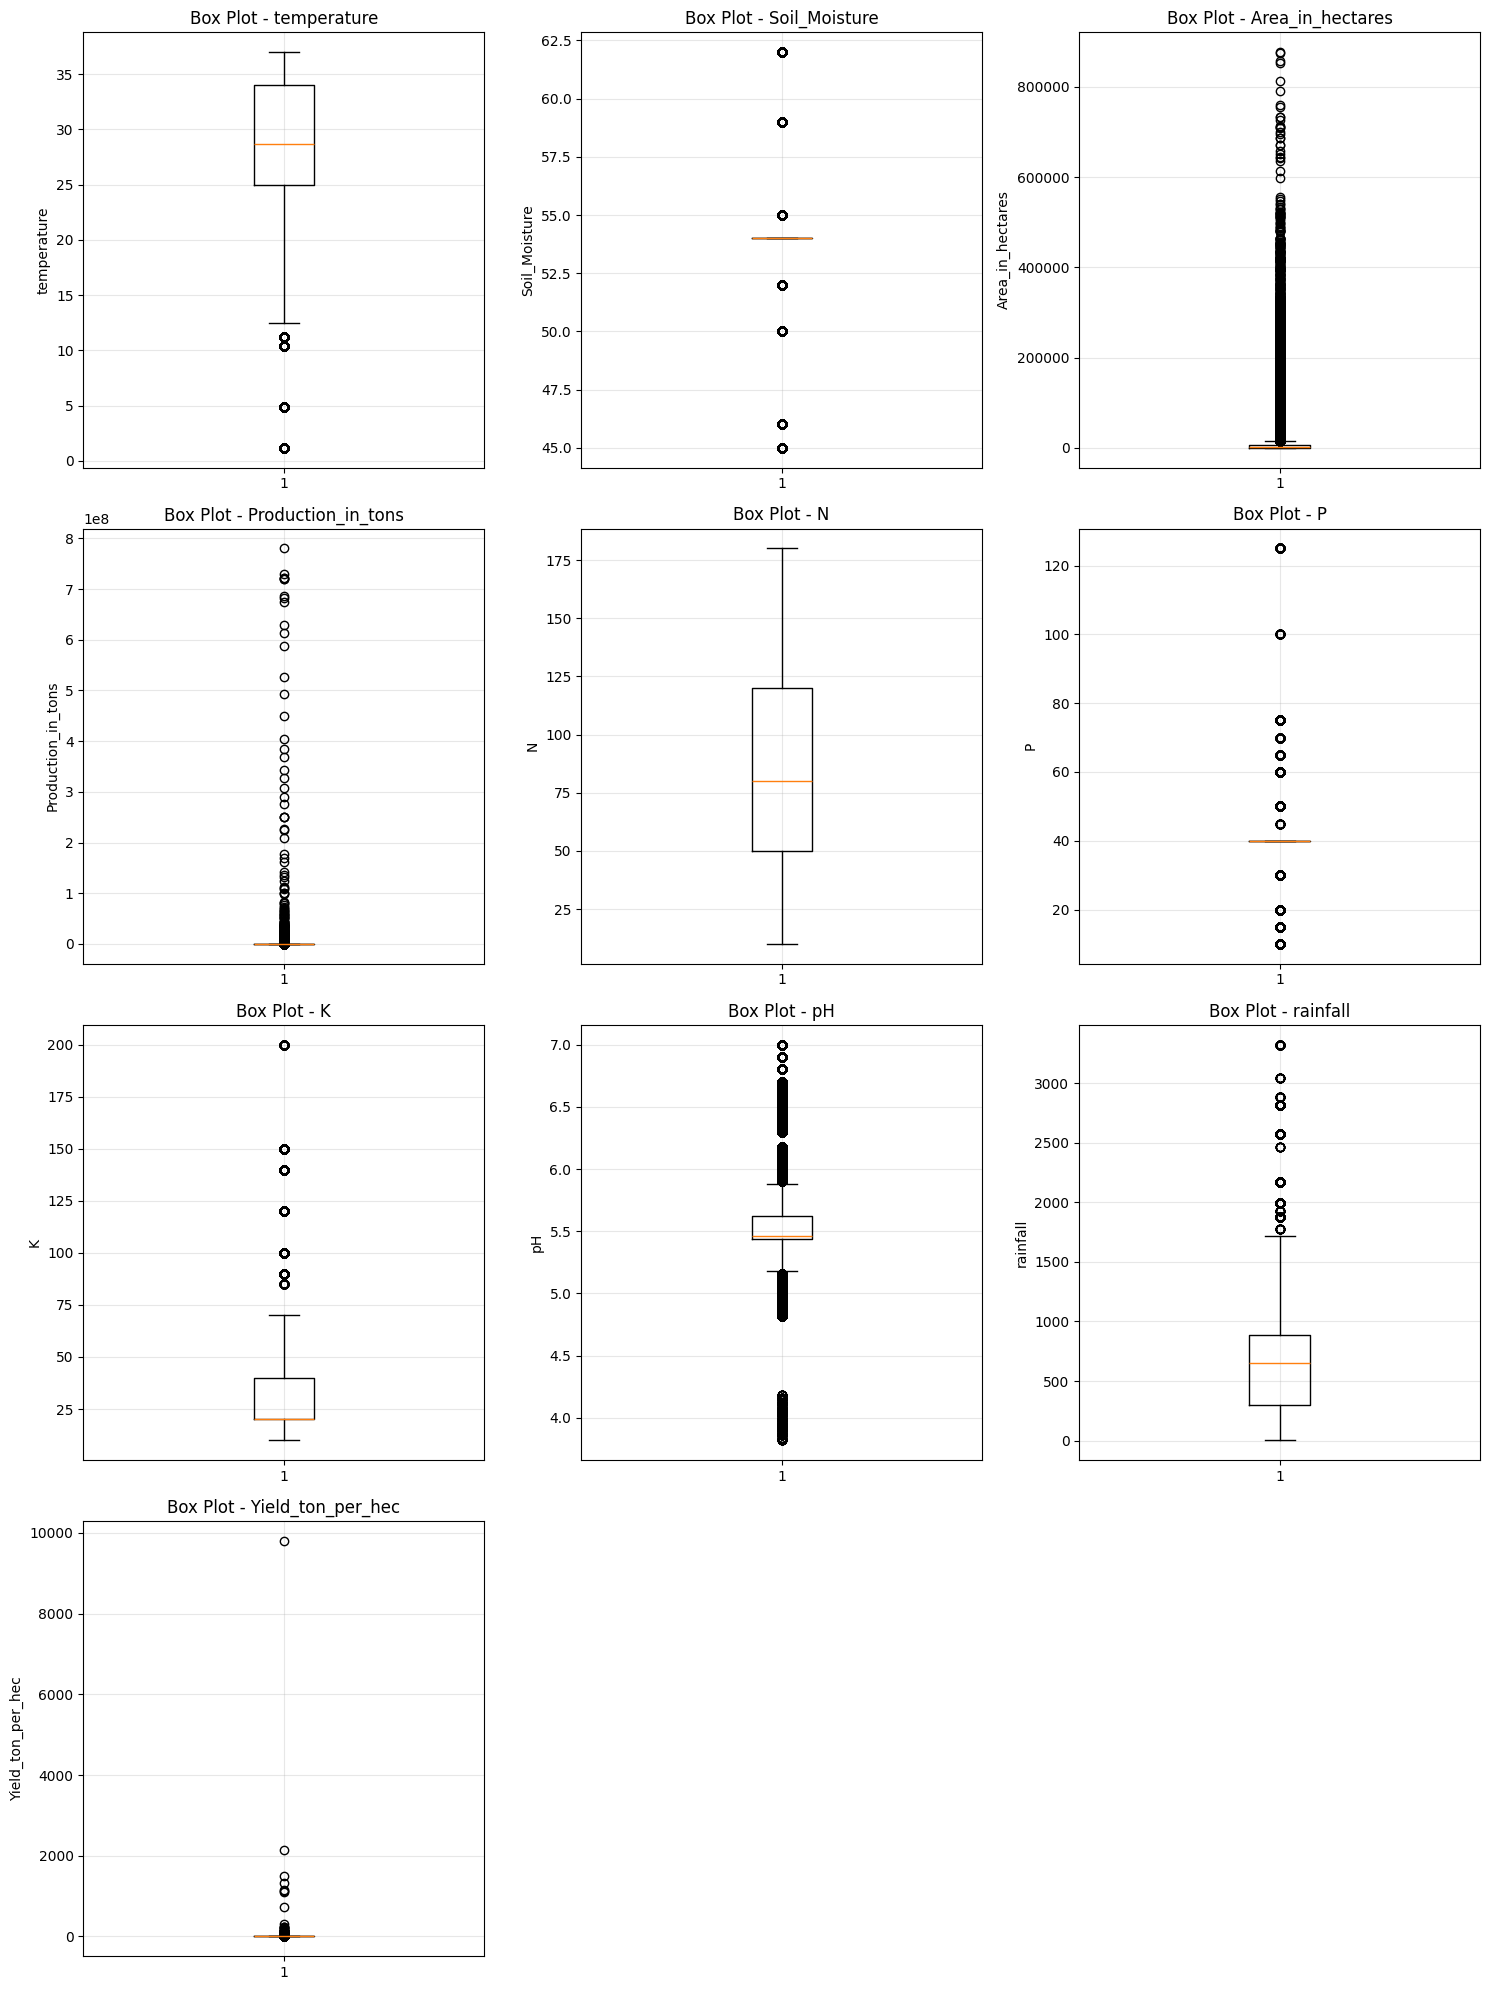

2. Creating correlation heatmap...


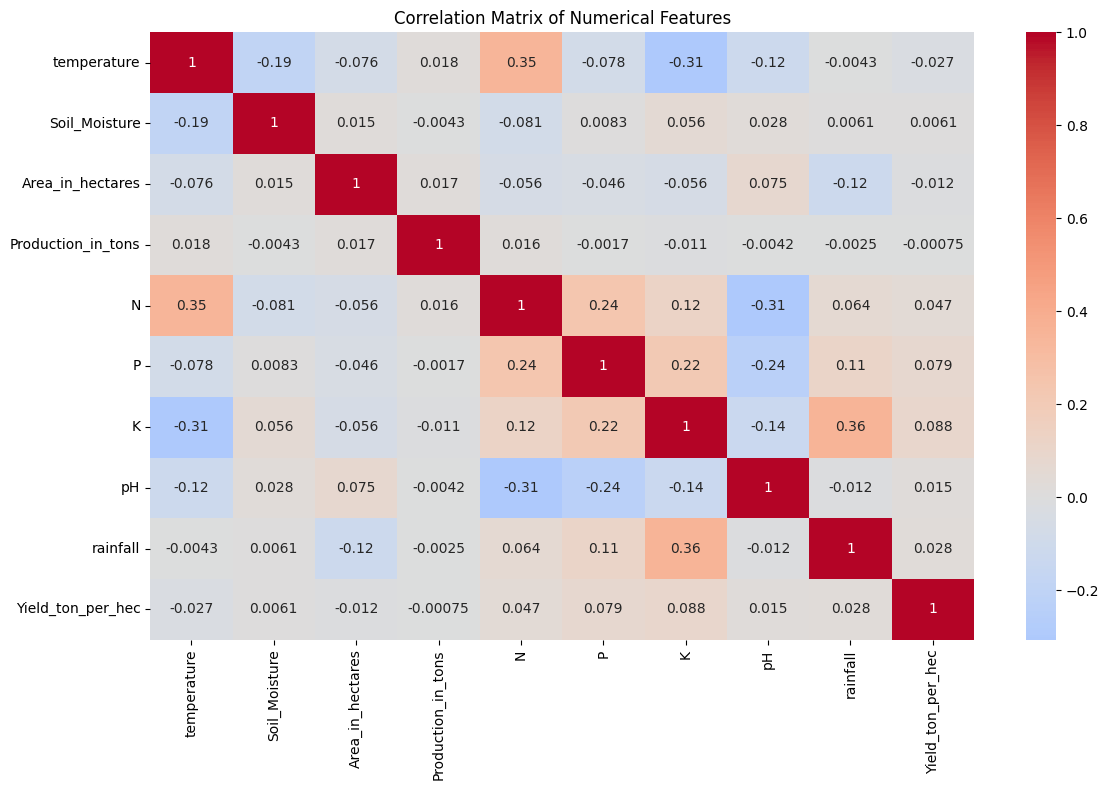

3. Creating scatter plots...


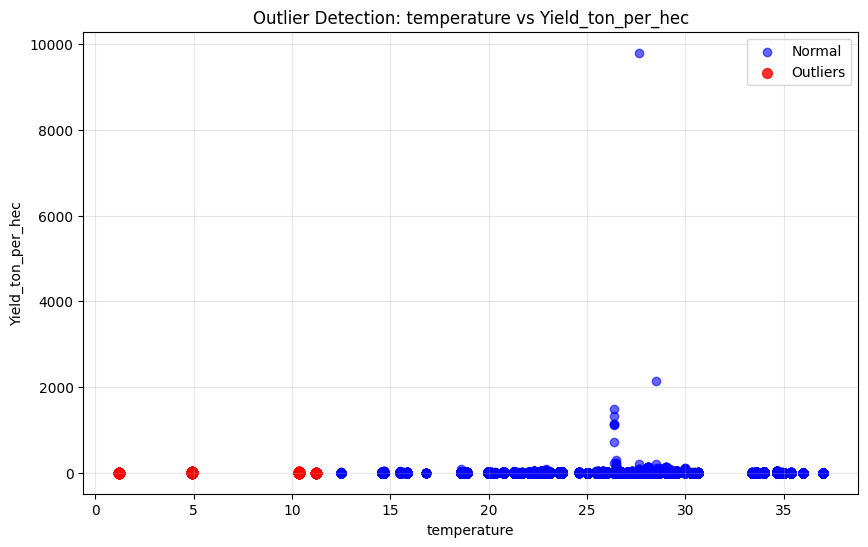

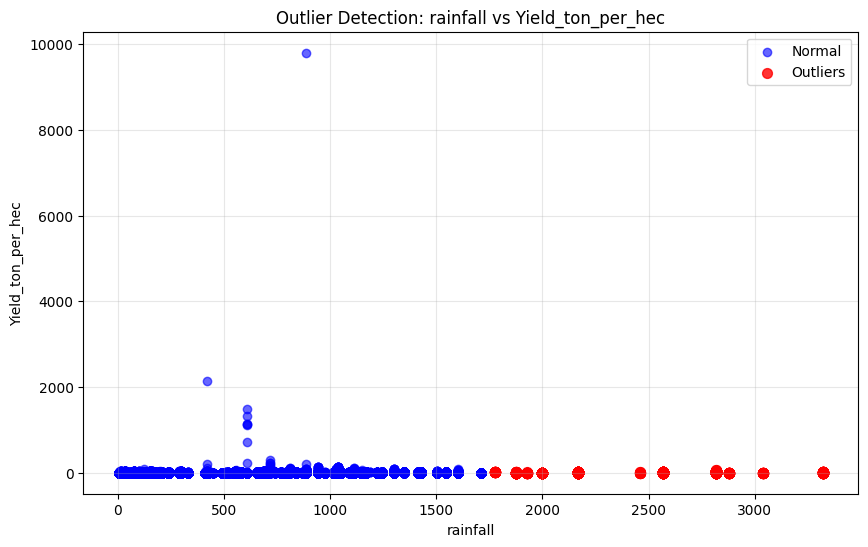

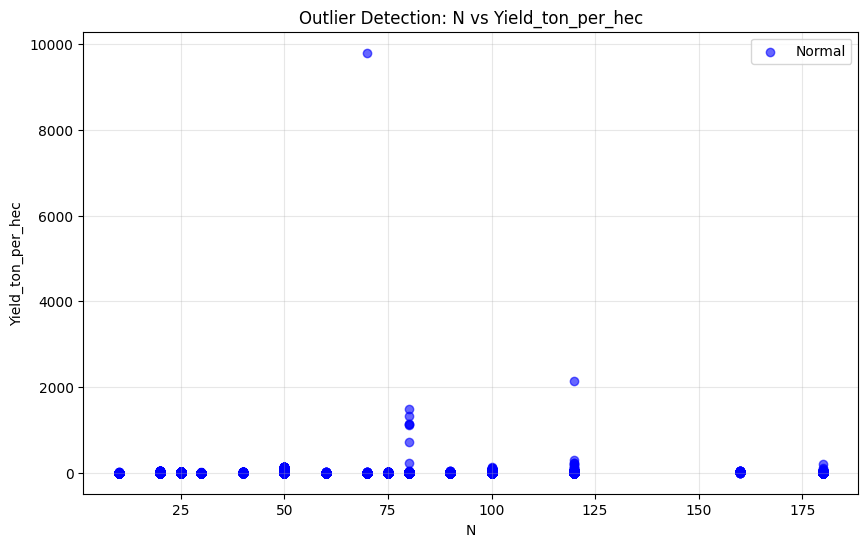

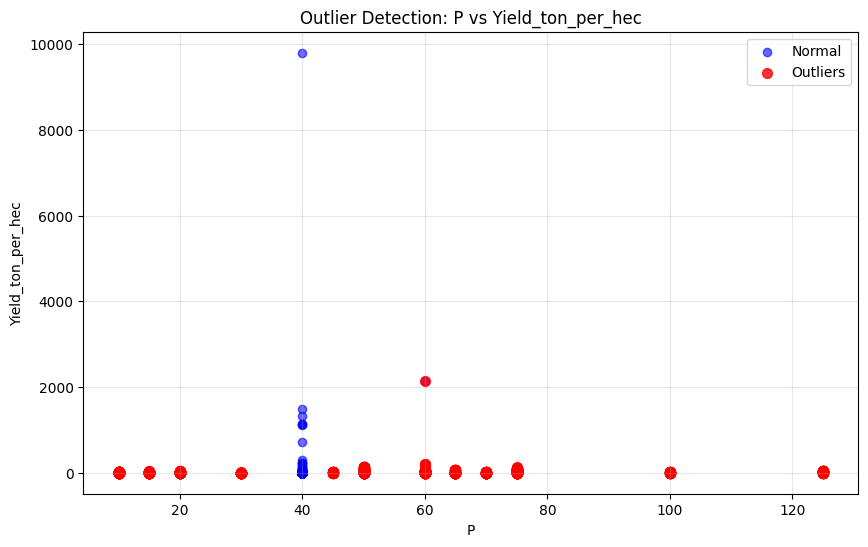

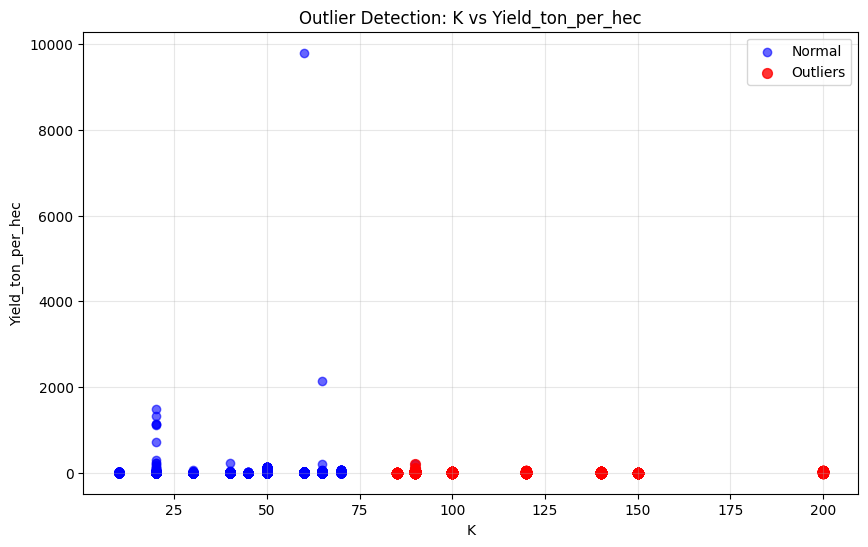

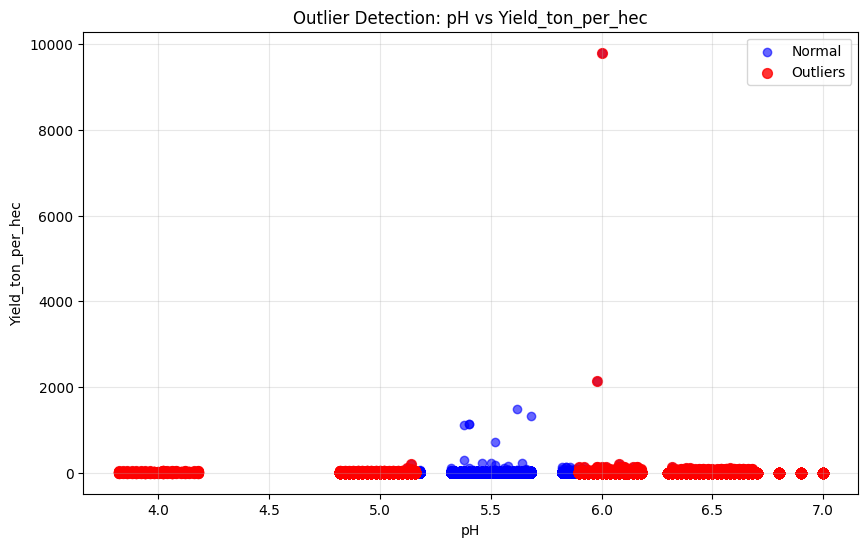

4. Creating distribution plots...


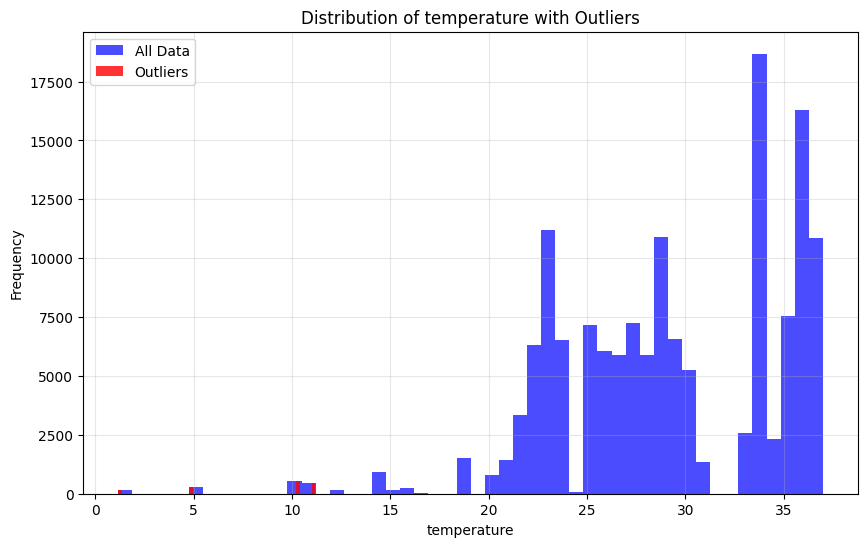

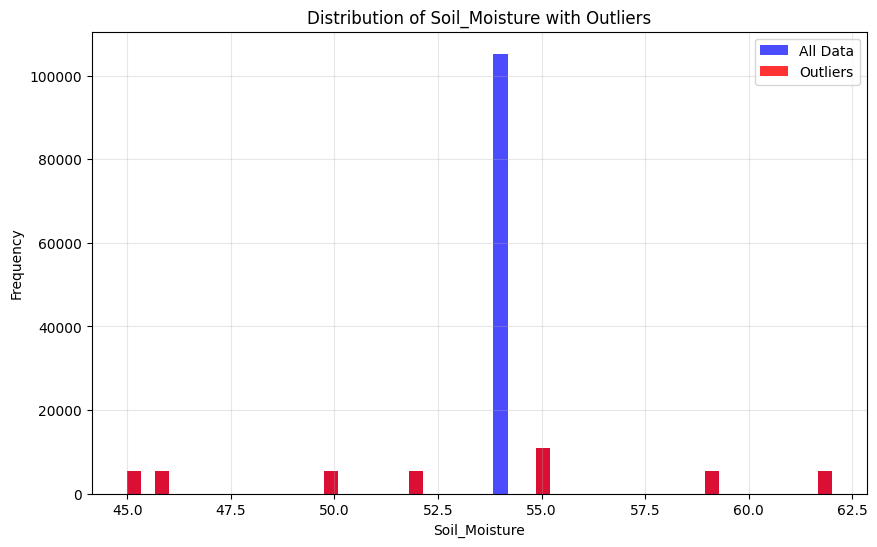

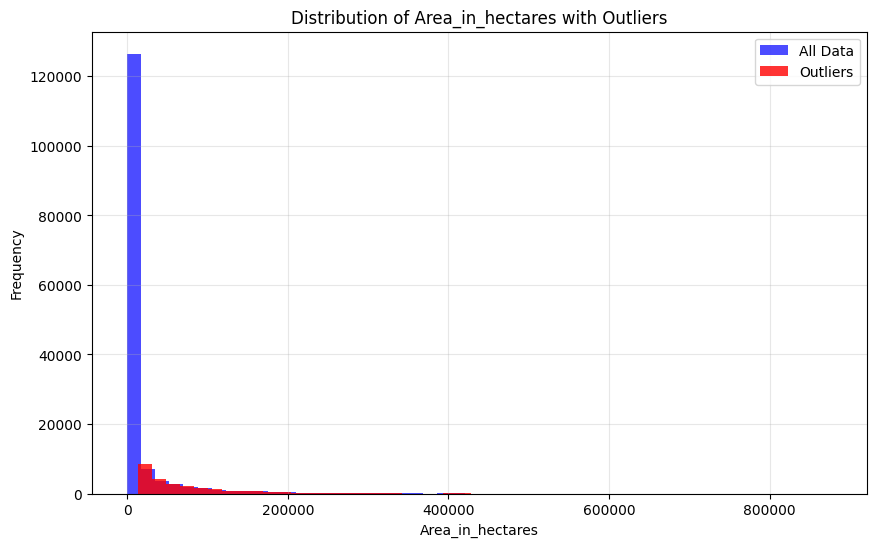

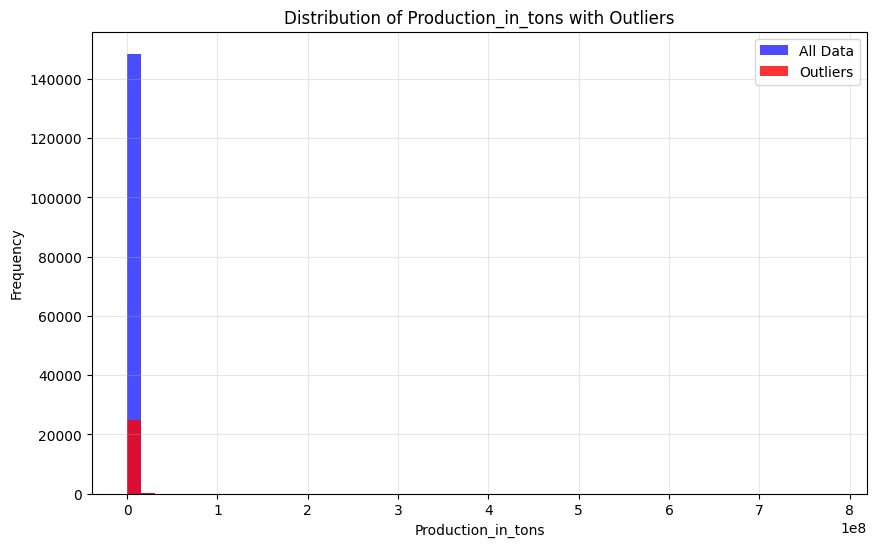

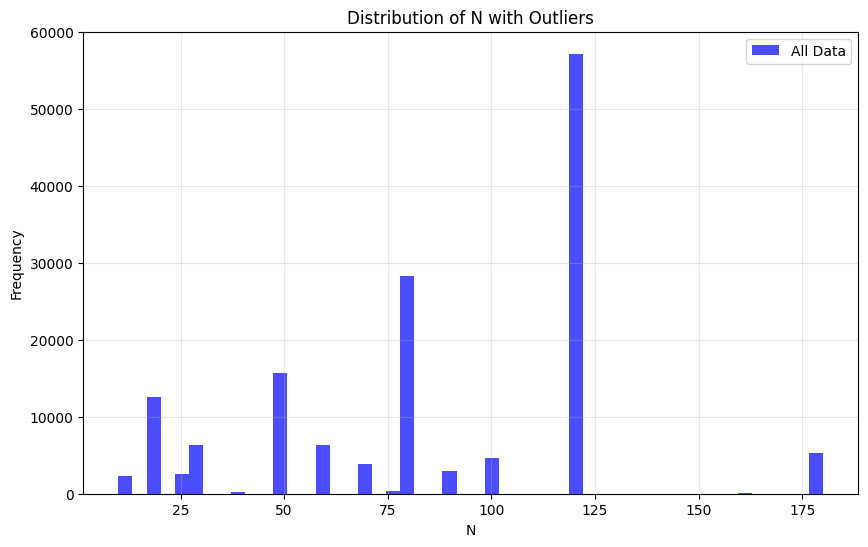

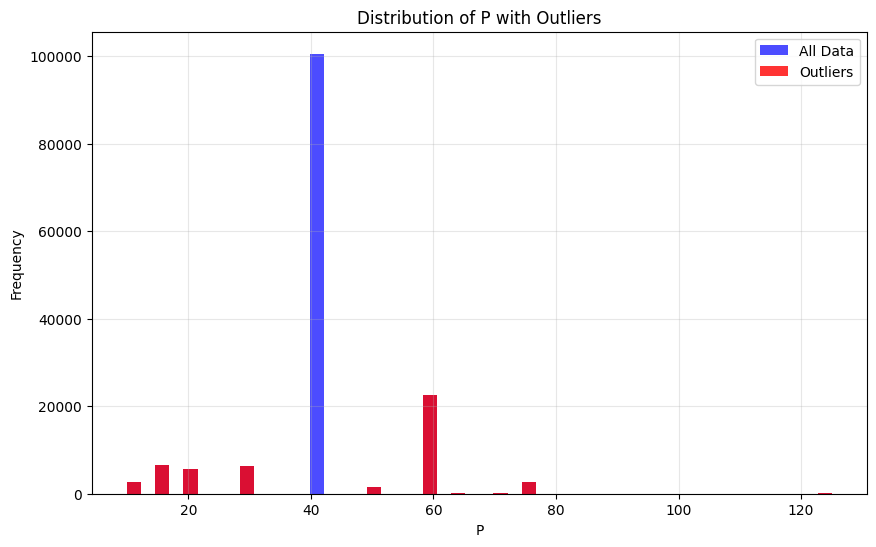

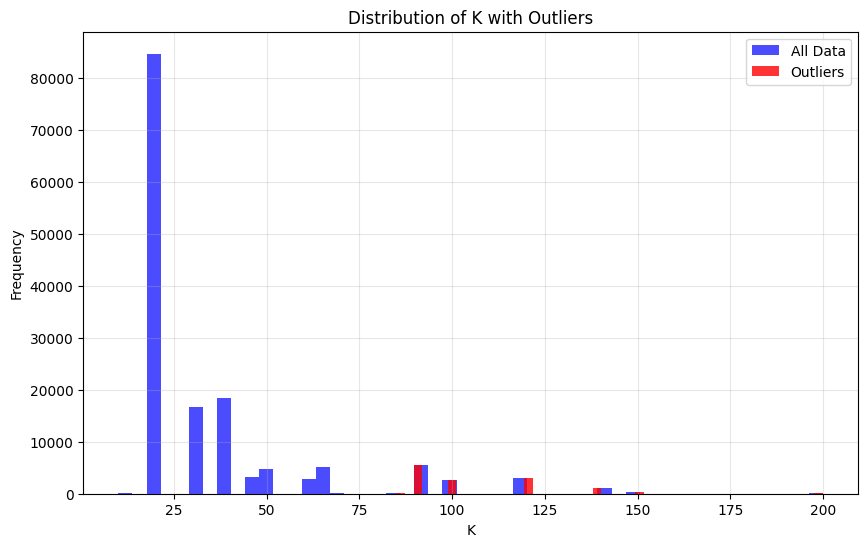

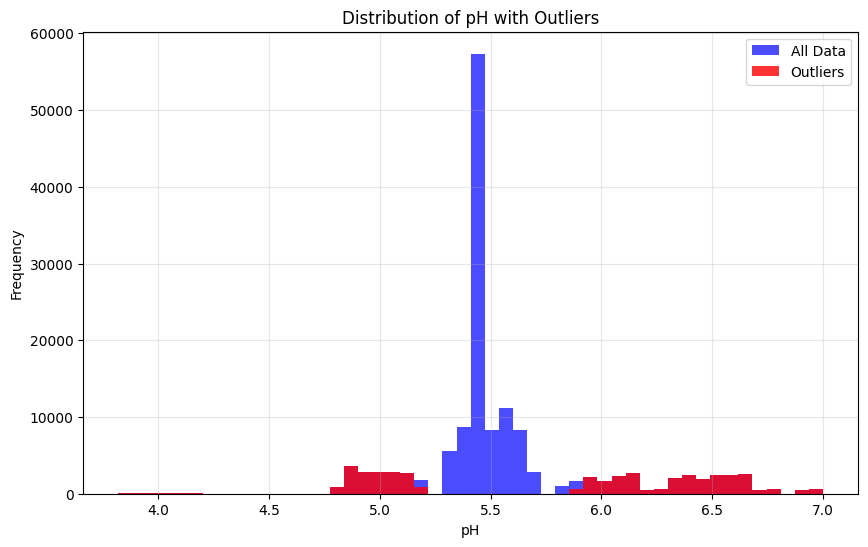

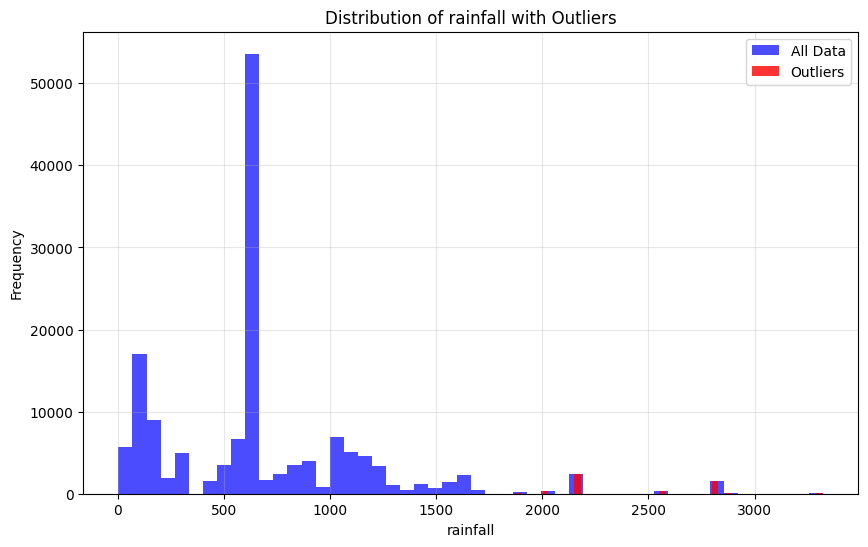

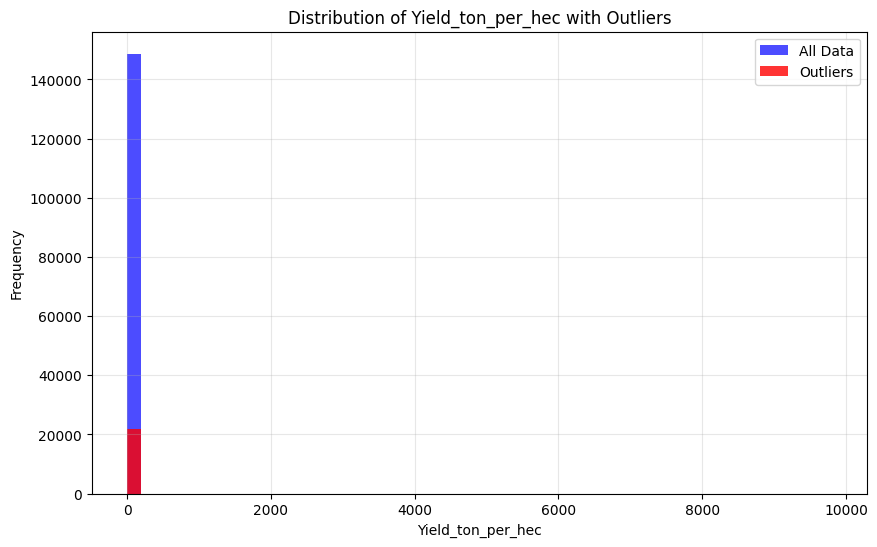

=== REMOVING OUTLIERS USING IQR METHOD ===
temperature: Removed 1457 outliers
Soil_Moisture: Removed 43438 outliers
Area_in_hectares: Removed 17375 outliers
Production_in_tons: Removed 12360 outliers
N: Removed 0 outliers
P: Removed 132 outliers
K: Removed 6400 outliers
pH: Removed 618 outliers
rainfall: Removed 618 outliers
Yield_ton_per_hec: Removed 9347 outliers

Total outliers removed: 91745
Dataset shape: (148721, 12) -> (56976, 12)

=== BEFORE vs AFTER COMPARISON ===
Original dataset shape: (148721, 12)
Cleaned dataset shape: (56976, 12)
Percentage of data retained: 38.31%

Cleaned data (without outliers) saved as 'data_without_outliers.csv'


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

def detect_outliers_iqr(df, column):
    """
    Detect outliers using Interquartile Range (IQR) method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(df, column, threshold=3):
    """
    Detect outliers using Z-Score method
    """
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]
    
    return outliers, z_scores

def detect_outliers_isolation_forest(df, contamination=0.1):
    """
    Detect outliers using Isolation Forest
    """
    # Select numerical columns only
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    X = df[numerical_cols]
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply Isolation Forest
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    outlier_labels = iso_forest.fit_predict(X_scaled)
    
    # -1 indicates outlier, 1 indicates normal
    outliers = df[outlier_labels == -1]
    
    return outliers, outlier_labels

def visualize_outliers_boxplot(df, columns):
    """
    Visualize outliers using box plots
    """
    n_cols = len(columns)
    n_rows = (n_cols + 2) // 3  # 3 plots per row
    
    plt.figure(figsize=(15, 5 * n_rows))
    
    for i, col in enumerate(columns, 1):
        plt.subplot(n_rows, 3, i)
        plt.boxplot(df[col].dropna())
        plt.title(f'Box Plot - {col}')
        plt.ylabel(col)
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def visualize_outliers_scatter(df, x_col, y_col, outliers_df=None):
    """
    Visualize outliers using scatter plot
    """
    plt.figure(figsize=(10, 6))
    
    # Plot normal points
    plt.scatter(df[x_col], df[y_col], alpha=0.6, label='Normal', color='blue')
    
    # Plot outliers if provided
    if outliers_df is not None and len(outliers_df) > 0:
        plt.scatter(outliers_df[x_col], outliers_df[y_col], 
                   alpha=0.8, label='Outliers', color='red', s=50)
    
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Outlier Detection: {x_col} vs {y_col}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def visualize_outliers_histogram(df, column, outliers_df=None):
    """
    Visualize outliers using histogram
    """
    plt.figure(figsize=(10, 6))
    
    # Plot histogram of all data
    plt.hist(df[column].dropna(), bins=50, alpha=0.7, label='All Data', color='blue')
    
    # Highlight outliers if provided
    if outliers_df is not None and len(outliers_df) > 0:
        plt.hist(outliers_df[column].dropna(), bins=50, alpha=0.8, 
                label='Outliers', color='red')
    
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column} with Outliers')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def comprehensive_outlier_analysis(df):
    """
    Perform comprehensive outlier analysis on all numerical columns
    """
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    outlier_summary = {}
    
    print("=== COMPREHENSIVE OUTLIER ANALYSIS ===\n")
    
    for col in numerical_cols:
        print(f"Analyzing column: {col}")
        print("-" * 40)
        
        # IQR method
        iqr_outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
        print(f"IQR Method - Outliers detected: {len(iqr_outliers)}")
        print(f"Valid range: {lower_bound:.2f} to {upper_bound:.2f}")
        
        # Z-Score method
        zscore_outliers, z_scores = detect_outliers_zscore(df, col, threshold=3)
        print(f"Z-Score Method - Outliers detected: {len(zscore_outliers)}")
        
        outlier_summary[col] = {
            'iqr_outliers': len(iqr_outliers),
            'zscore_outliers': len(zscore_outliers),
            'iqr_bounds': (lower_bound, upper_bound)
        }
        
        print()
    
    # Isolation Forest for multivariate outliers
    iso_outliers, iso_labels = detect_outliers_isolation_forest(df, contamination=0.1)
    print(f"Isolation Forest - Multivariate outliers detected: {len(iso_outliers)}")
    
    return outlier_summary, iso_outliers

def visualize_all_outliers(df):
    """
    Create comprehensive visualizations for outlier detection
    """
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    
    print("=== CREATING OUTLIER VISUALIZATIONS ===")
    
    # 1. Box plots for all numerical columns
    print("1. Creating box plots...")
    visualize_outliers_boxplot(df, numerical_cols)
    
    # 2. Correlation heatmap
    print("2. Creating correlation heatmap...")
    plt.figure(figsize=(12, 8))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()
    
    # 3. Scatter plots for key relationships
    print("3. Creating scatter plots...")
    if 'Yield_ton_per_hec' in df.columns:
        key_features = ['temperature', 'rainfall', 'N', 'P', 'K', 'pH']
        for feature in key_features:
            if feature in df.columns:
                # Detect outliers using IQR for visualization
                outliers, _, _ = detect_outliers_iqr(df, feature)
                visualize_outliers_scatter(df, feature, 'Yield_ton_per_hec', outliers)
    
    # 4. Distribution plots
    print("4. Creating distribution plots...")
    for col in numerical_cols:
        outliers, _, _ = detect_outliers_iqr(df, col)
        visualize_outliers_histogram(df, col, outliers)

def remove_outliers_iqr(df, columns=None, factor=1.5):
    """
    Remove outliers using IQR method
    """
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
    
    df_clean = df.copy()
    total_outliers_removed = 0
    
    print("=== REMOVING OUTLIERS USING IQR METHOD ===")
    
    for col in columns:
        if col in df.columns:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - factor * IQR
            upper_bound = Q3 + factor * IQR
            
            # Count outliers before removal
            outliers_mask = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
            outliers_count = outliers_mask.sum()
            
            # Remove outliers
            df_clean = df_clean[~outliers_mask]
            
            total_outliers_removed += outliers_count
            print(f"{col}: Removed {outliers_count} outliers")
    
    print(f"\nTotal outliers removed: {total_outliers_removed}")
    print(f"Dataset shape: {df.shape} -> {df_clean.shape}")
    
    return df_clean

def remove_outliers_zscore(df, columns=None, threshold=3):
    """
    Remove outliers using Z-Score method
    """
    if columns is None:
        columns = df.select_dtypes(include=[np.number]).columns
    
    df_clean = df.copy()
    total_outliers_removed = 0
    
    print("=== REMOVING OUTLIERS USING Z-SCORE METHOD ===")
    
    for col in columns:
        if col in df.columns:
            z_scores = np.abs(stats.zscore(df_clean[col]))
            outliers_mask = z_scores > threshold
            outliers_count = outliers_mask.sum()
            
            # Remove outliers
            df_clean = df_clean[~outliers_mask]
            
            total_outliers_removed += outliers_count
            print(f"{col}: Removed {outliers_count} outliers")
    
    print(f"\nTotal outliers removed: {total_outliers_removed}")
    print(f"Dataset shape: {df.shape} -> {df_clean.shape}")
    
    return df_clean

def handle_outliers_comprehensive(df, method='iqr', save_results=True):
    """
    Comprehensive outlier handling workflow
    """
    print("=== COMPREHENSIVE OUTLIER HANDLING WORKFLOW ===\n")
    
    # Step 1: Analyze outliers
    outlier_summary, iso_outliers = comprehensive_outlier_analysis(df)
    
    # Step 2: Visualize outliers
    visualize_all_outliers(df)
    
    # Step 3: Remove outliers based on chosen method
    if method == 'iqr':
        df_clean = remove_outliers_iqr(df)
    elif method == 'zscore':
        df_clean = remove_outliers_zscore(df)
    else:
        print("Invalid method. Using IQR method by default.")
        df_clean = remove_outliers_iqr(df)
    
    # Step 4: Compare before and after
    print("\n=== BEFORE vs AFTER COMPARISON ===")
    print(f"Original dataset shape: {df.shape}")
    print(f"Cleaned dataset shape: {df_clean.shape}")
    print(f"Percentage of data retained: {(len(df_clean)/len(df))*100:.2f}%")
    
    # Step 5: Save results
    if save_results:
        df_clean.to_csv('data_without_outliers.csv', index=False)
        print("\nCleaned data (without outliers) saved as 'data_without_outliers.csv'")
    
    return df_clean, outlier_summary


df_cleaned = pd.read_csv('cleaned_data.csv')
df_no_outliers, outlier_info = handle_outliers_comprehensive(df_cleaned, method='iqr')

===== XGBOOST REGRESSION WORKFLOW =====
=== PREPARING FEATURES AND TARGET ===
Features selected: ['temperature', 'Soil_Moisture', 'Area_in_hectares', 'Production_in_tons', 'N', 'P', 'K', 'pH', 'rainfall']
Target variable: Yield_ton_per_hec
Feature matrix shape: (56976, 9)
Target vector shape: (56976,)

=== SPLITTING AND SCALING DATA ===
Training set size: (45580, 9)
Test set size: (11396, 9)
Features scaled using StandardScaler

============== BASIC XGBOOST MODEL ===============

=== TRAINING BASIC XGBOOST MODEL ===
Training RMSE: 0.1282
Test RMSE: 0.1404
Training R²: 0.9746
Test R²: 0.9692
Training MAE: 0.0846
Test MAE: 0.0909
✅ No significant overfitting detected


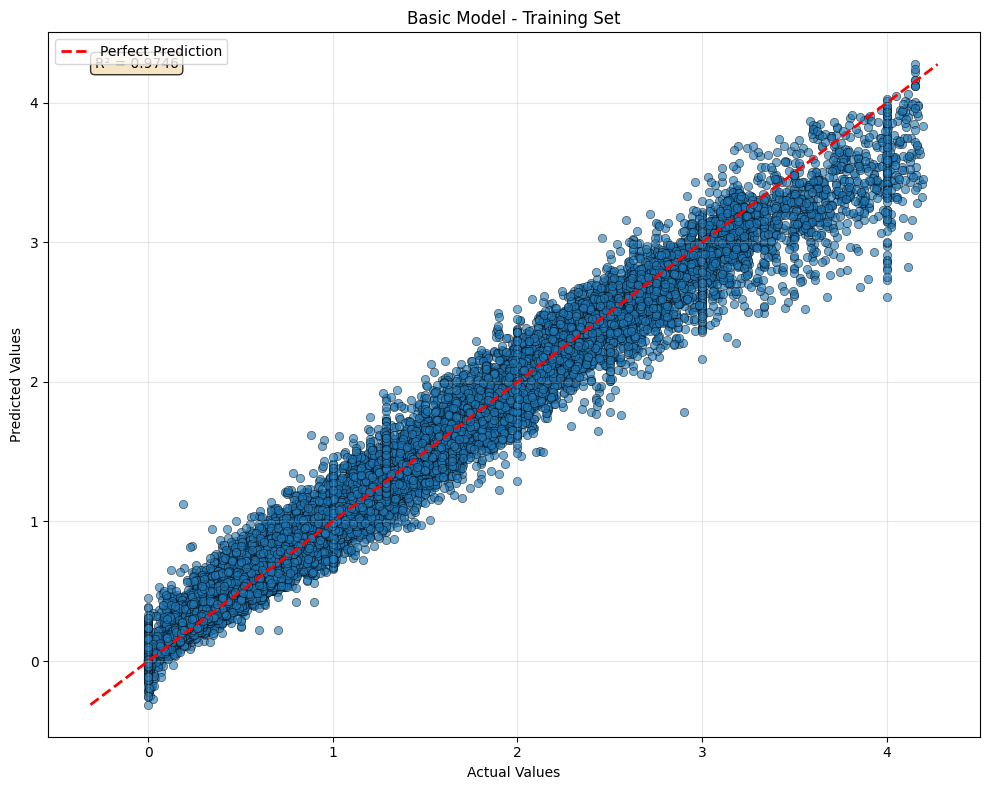

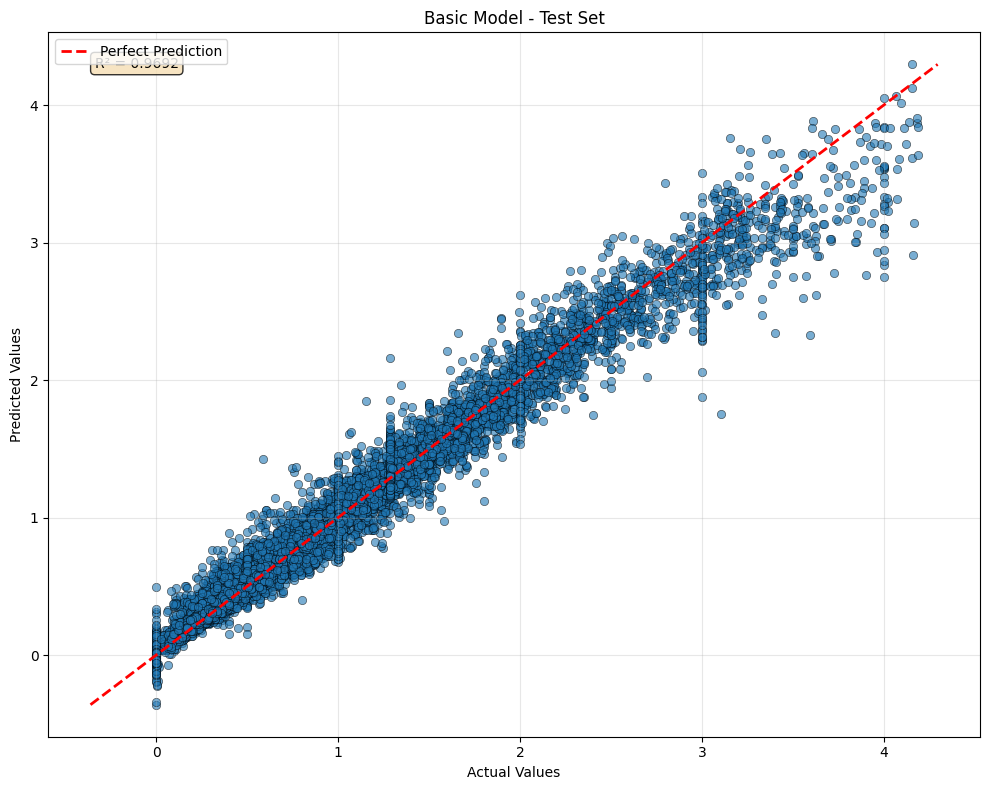

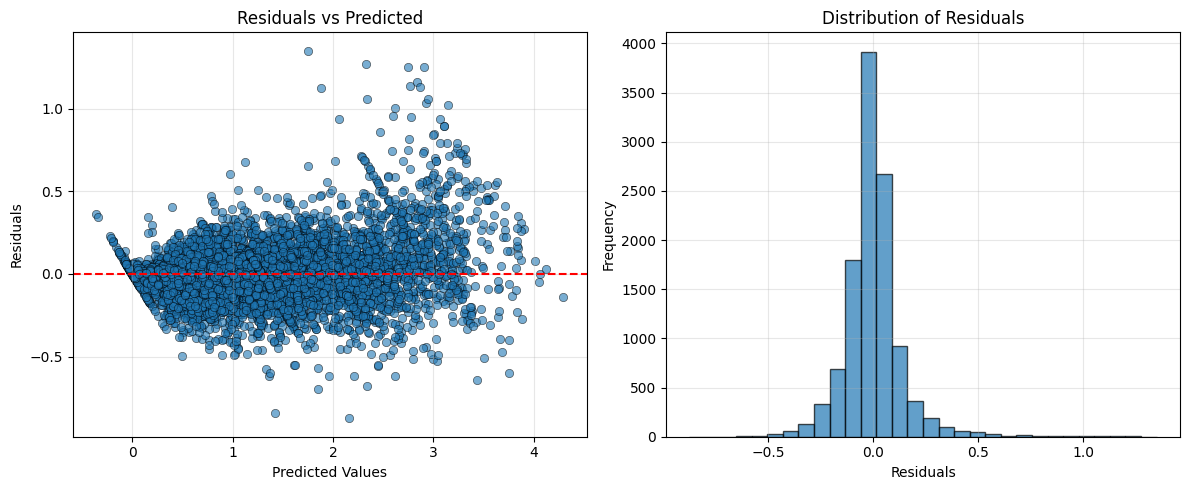


=========== REGULARIZED XGBOOST MODEL ============

=== TRAINING XGBOOST WITH ENHANCED REGULARIZATION ===
Training RMSE: 0.3031
Test RMSE: 0.3073
Training R²: 0.8581
Test R²: 0.8524
Training MAE: 0.2023
Test MAE: 0.2058
✅ No significant overfitting detected


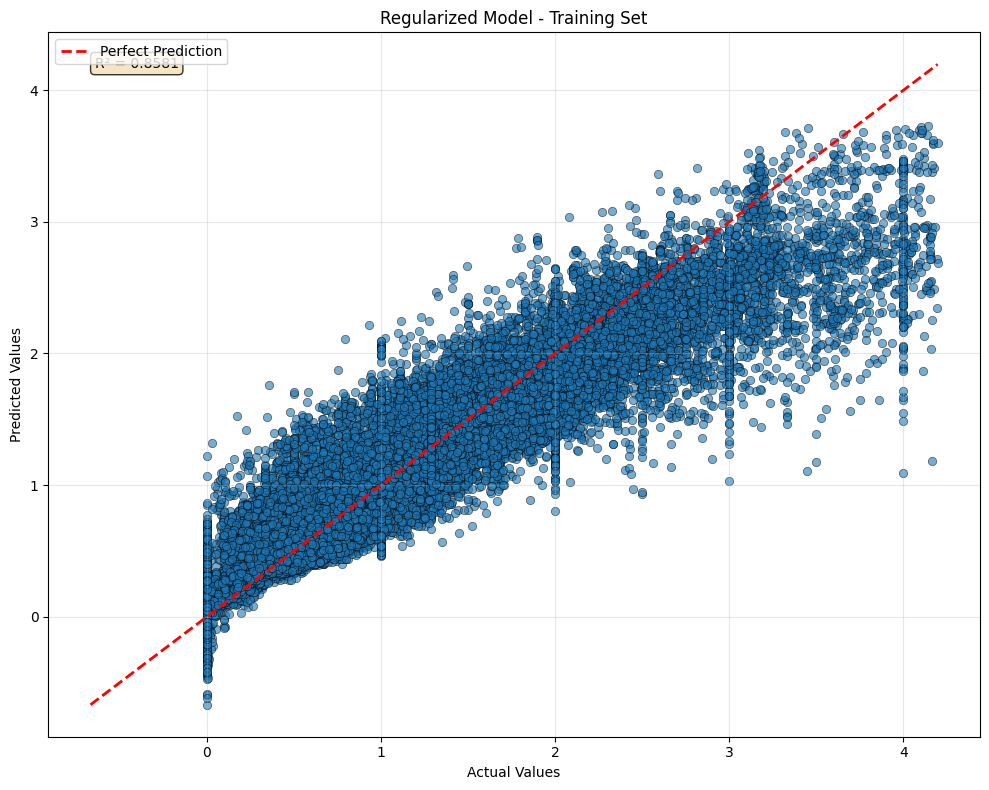

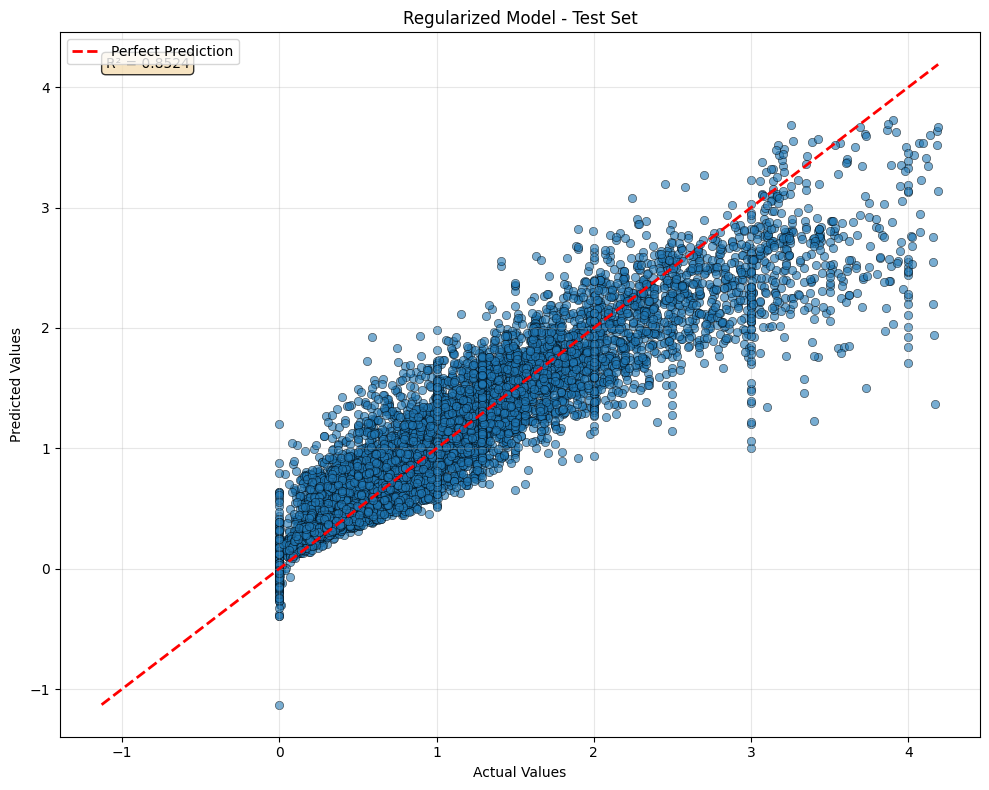

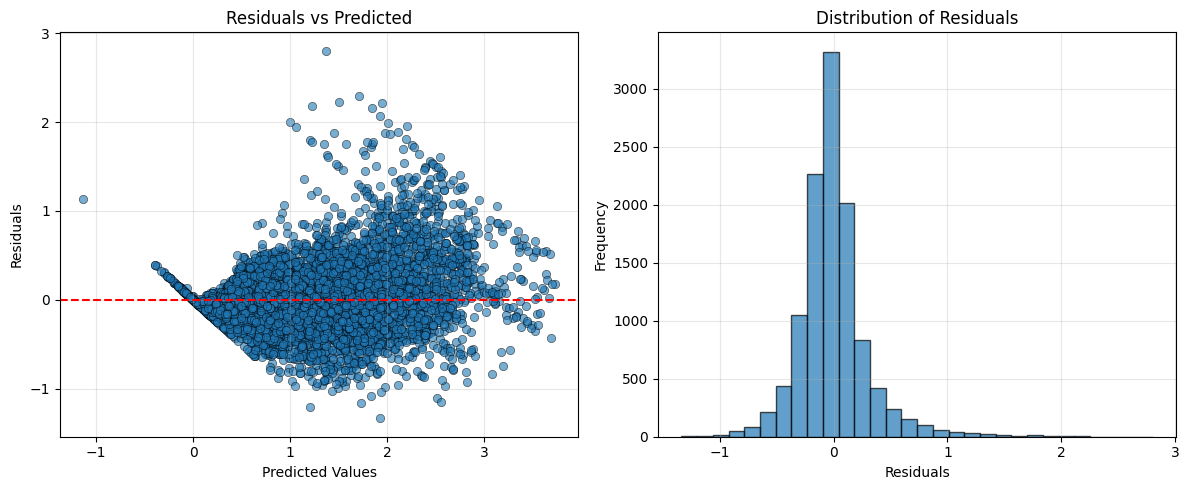


=============== FEATURE IMPORTANCE ===============

=== FEATURE IMPORTANCE ANALYSIS ===
Top 10 Most Important Features:
              feature  importance
4                   N    0.267375
6                   K    0.138686
3  Production_in_tons    0.129347
7                  pH    0.113277
2    Area_in_hectares    0.110412
5                   P    0.106376
8            rainfall    0.088466
0         temperature    0.046060
1       Soil_Moisture    0.000000


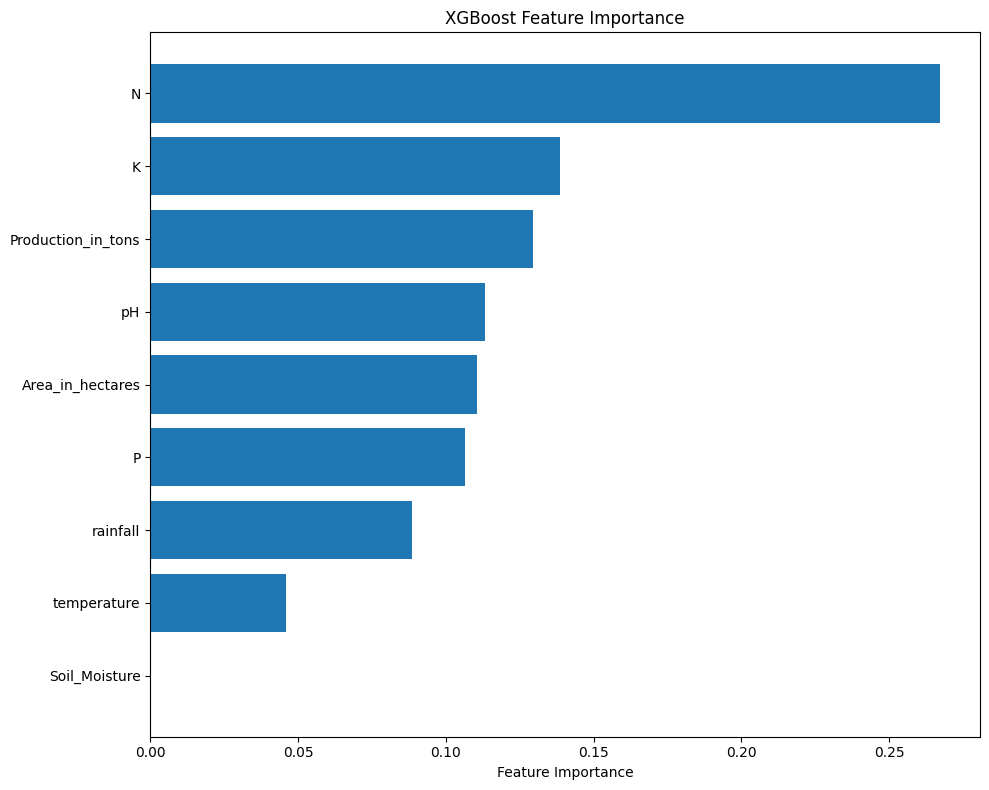


================ CROSS-VALIDATION ================

=== CROSS-VALIDATION EVALUATION ===
Cross-Validation RMSE Scores: [0.389198272871921, 0.3051291716465169, 0.3508231411183087, 0.33841807701572063, 0.3550562072701759]
Mean CV RMSE: 0.3477
Std CV RMSE: 0.0271
Cross-Validation R² Scores: [0.6123100326178517, 0.8539501531907348, 0.833728120069665, 0.8371679459095934, 0.8296367254063023]
Mean CV R²: 0.7934
Std CV R²: 0.0909

================== SAVING MODEL ==================

=== SAVING MODEL AND PREPROCESSING OBJECTS ===
Model saved to best_xgboost_model.pkl
Scaler saved to scaler.pkl
Feature names saved to feature_names.pkl

================= FINAL SUMMARY ==================

Basic Model Performance:
Test RMSE: 0.1404
Test R²: 0.9692

Regularized Model Performance:
Test RMSE: 0.3073
Test R²: 0.8524

Cross-Validation Results:
Mean CV RMSE: 0.3477
Mean CV R²: 0.7934

Top 5 Features:
              feature  importance
4                   N    0.267375
6                   K    0.138686
3  P

In [12]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

def prepare_features_target(df, target_column='Yield_ton_per_hec'):
    """
    Prepare features and target variable for training
    """
    print("=== PREPARING FEATURES AND TARGET ===")
    
    # Separate features and target
    if target_column not in df.columns:
        raise ValueError(f"Target column '{target_column}' not found in dataset")
    
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    # Select only numerical features for XGBoost
    numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
    X = X[numerical_features]
    
    print(f"Features selected: {numerical_features}")
    print(f"Target variable: {target_column}")
    print(f"Feature matrix shape: {X.shape}")
    print(f"Target vector shape: {y.shape}")
    
    return X, y, numerical_features

def split_and_scale_data(X, y, test_size=0.2, random_state=42, scale_features=True):
    """
    Split data into train/test sets and scale features if needed
    """
    print("\n=== SPLITTING AND SCALING DATA ===")
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    print(f"Training set size: {X_train.shape}")
    print(f"Test set size: {X_test.shape}")
    
    # Scale features (optional for XGBoost, but can help with regularization)
    if scale_features:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Convert back to DataFrame to maintain column names
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
        
        print("Features scaled using StandardScaler")
        return X_train_scaled, X_test_scaled, y_train, y_test, scaler
    else:
        print("Features not scaled")
        return X_train, X_test, y_train, y_test, None

def train_xgboost_basic(X_train, y_train, X_test, y_test):
    """
    Train basic XGBoost model with default regularization
    """
    print("\n=== TRAINING BASIC XGBOOST MODEL ===")
    
    # Basic XGBoost parameters with regularization
    params = {
        'objective': 'reg:squarederror',
        'n_estimators': 100,
        'max_depth': 6,
        'learning_rate': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'reg_alpha': 0.1,  # L1 regularization
        'reg_lambda': 1.0,  # L2 regularization
        'random_state': 42
    }
    
    # Train the model
    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Training MAE: {train_mae:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    
    # Check for overfitting
    if train_rmse < test_rmse * 0.8:
        print("⚠️  Potential overfitting detected!")
    else:
        print("✅ No significant overfitting detected")
    
    return model, {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mae': train_mae,
        'test_mae': test_mae
    }

def train_xgboost_with_regularization(X_train, y_train, X_test, y_test):
    """
    Train XGBoost model with enhanced regularization techniques
    """
    print("\n=== TRAINING XGBOOST WITH ENHANCED REGULARIZATION ===")
    
    # Enhanced parameters with stronger regularization
    params = {
        'objective': 'reg:squarederror',
        'n_estimators': 200,
        'max_depth': 4,  # Reduced depth to prevent overfitting
        'learning_rate': 0.05,  # Lower learning rate
        'subsample': 0.7,  # Row sampling
        'colsample_bytree': 0.7,  # Column sampling
        'colsample_bylevel': 0.7,  # Column sampling per level
        'reg_alpha': 1.0,  # L1 regularization (Lasso)
        'reg_lambda': 2.0,  # L2 regularization (Ridge)
        'min_child_weight': 3,  # Minimum sum of weights in a child
        'gamma': 0.1,  # Minimum loss reduction required for split
        'random_state': 42,
        'early_stopping_rounds': 20,  # MOVED TO CONSTRUCTOR
        'eval_metric': 'rmse'  # ADDED EVAL METRIC
    }
    
    # Train the model
    model = xgb.XGBRegressor(**params)
    model.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False
    )
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Test R²: {test_r2:.4f}")
    print(f"Training MAE: {train_mae:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    
    # Check for overfitting
    if train_rmse < test_rmse * 0.8:
        print("⚠️  Potential overfitting detected!")
    else:
        print("✅ No significant overfitting detected")
    
    return model, {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mae': train_mae,
        'test_mae': test_mae
    }

from sklearn.model_selection import KFold

def evaluate_model_with_cv(model, X, y, cv_folds=5):
    """
    Evaluate model using custom cross-validation with early stopping
    """
    print("\n=== CROSS-VALIDATION EVALUATION ===")
    
    kf = KFold(n_splits=cv_folds)
    rmse_scores = []
    r2_scores = []
    
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Clone the model to avoid parameter leakage
        fold_model = xgb.XGBRegressor(**model.get_params())
        
        fold_model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            verbose=False
        )
        
        y_pred = fold_model.predict(X_val)
        rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_pred)))
        r2_scores.append(r2_score(y_val, y_pred))
    
    print(f"Cross-Validation RMSE Scores: {rmse_scores}")
    print(f"Mean CV RMSE: {np.mean(rmse_scores):.4f}")
    print(f"Std CV RMSE: {np.std(rmse_scores):.4f}")
    print(f"Cross-Validation R² Scores: {r2_scores}")
    print(f"Mean CV R²: {np.mean(r2_scores):.4f}")
    print(f"Std CV R²: {np.std(r2_scores):.4f}")
    
    return {
        'cv_rmse_mean': np.mean(rmse_scores),
        'cv_rmse_std': np.std(rmse_scores),
        'cv_r2_mean': np.mean(r2_scores),
        'cv_r2_std': np.std(r2_scores)
    }
    
def plot_feature_importance(model, feature_names):
    """
    Plot feature importance from the trained model
    """
    print("\n=== FEATURE IMPORTANCE ANALYSIS ===")
    
    # Get feature importance
    importance = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)
    
    print("Top 10 Most Important Features:")
    print(feature_importance_df.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(feature_names)), 
             feature_importance_df['importance'][::-1])
    plt.yticks(range(len(feature_names)), 
               feature_importance_df['feature'][::-1])
    plt.xlabel('Feature Importance')
    plt.title('XGBoost Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return feature_importance_df

def plot_predictions_vs_actual(y_true, y_pred, title="Predictions vs Actual"):
    """
    Plot predictions vs actual values
    """
    plt.figure(figsize=(10, 8))
    
    # Scatter plot
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolors='k', linewidth=0.5)
    
    # Perfect prediction line
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    
    # Add labels and title
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add R² score
    r2 = r2_score(y_true, y_pred)
    plt.text(0.05, 0.95, f'R² = {r2:.4f}', transform=plt.gca().transAxes, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

def plot_residuals(y_true, y_pred, title="Residual Plot"):
    """
    Plot residuals to check for patterns
    """
    residuals = y_true - y_pred
    
    plt.figure(figsize=(12, 5))
    
    # Residuals vs Predicted
    plt.subplot(1, 2, 1)
    plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='k', linewidth=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted')
    plt.grid(True, alpha=0.3)
    
    # Histogram of residuals
    plt.subplot(1, 2, 2)
    plt.hist(residuals, bins=30, alpha=0.7, edgecolor='black')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def save_model_and_scaler(model, scaler, feature_names, model_path='xgboost_model.pkl', 
                          scaler_path='scaler.pkl', features_path='feature_names.pkl'):
    """
    Save trained model, scaler, and feature names
    """
    print("\n=== SAVING MODEL AND PREPROCESSING OBJECTS ===")
    
    # Save model
    joblib.dump(model, model_path)
    print(f"Model saved to {model_path}")
    
    # Save scaler
    if scaler is not None:
        joblib.dump(scaler, scaler_path)
        print(f"Scaler saved to {scaler_path}")
    
    # Save feature names
    joblib.dump(feature_names, features_path)
    print(f"Feature names saved to {features_path}")
    
    return model_path, scaler_path, features_path

def load_model_and_scaler(model_path='xgboost_model.pkl', scaler_path='scaler.pkl', 
                          features_path='feature_names.pkl'):
    """
    Load trained model, scaler, and feature names
    """
    print("\n=== LOADING MODEL AND PREPROCESSING OBJECTS ===")
    
    # Load model
    model = joblib.load(model_path)
    print(f"Model loaded from {model_path}")
    
    # Load scaler
    try:
        scaler = joblib.load(scaler_path)
        print(f"Scaler loaded from {scaler_path}")
    except:
        scaler = None
        print("No scaler found")
    
    # Load feature names
    feature_names = joblib.load(features_path)
    print(f"Feature names loaded from {features_path}")
    
    return model, scaler, feature_names

def main():
    """
    Main function to execute the complete XGBoost modeling workflow
    """
    print("===== XGBOOST REGRESSION WORKFLOW =====")
    
    # 1. Load your dataset (replace this with your actual data loading code)
    df_data_without_outliers = pd.read_csv('data_without_outliers.csv')
    df = df_data_without_outliers

    
    # 2. Prepare features and target
    X, y, feature_names = prepare_features_target(df)
    
    # 3. Split and scale data
    X_train, X_test, y_train, y_test, scaler = split_and_scale_data(
        X, y, test_size=0.2, random_state=42, scale_features=True
    )
    
    # 4. Train basic XGBoost model
    print("\n" + "="*50)
    print(" BASIC XGBOOST MODEL ".center(50, '='))
    print("="*50)
    basic_model, basic_metrics = train_xgboost_basic(X_train, y_train, X_test, y_test)
    
    # Plot results for basic model
    y_train_pred_basic = basic_model.predict(X_train)
    y_test_pred_basic = basic_model.predict(X_test)
    
    plot_predictions_vs_actual(y_train, y_train_pred_basic, "Basic Model - Training Set")
    plot_predictions_vs_actual(y_test, y_test_pred_basic, "Basic Model - Test Set")
    plot_residuals(y_test, y_test_pred_basic, "Basic Model Residuals")
    
    # 5. Train regularized XGBoost model
    print("\n" + "="*50)
    print(" REGULARIZED XGBOOST MODEL ".center(50, '='))
    print("="*50)
    reg_model, reg_metrics = train_xgboost_with_regularization(X_train, y_train, X_test, y_test)
    
    # Plot results for regularized model
    y_train_pred_reg = reg_model.predict(X_train)
    y_test_pred_reg = reg_model.predict(X_test)
    
    plot_predictions_vs_actual(y_train, y_train_pred_reg, "Regularized Model - Training Set")
    plot_predictions_vs_actual(y_test, y_test_pred_reg, "Regularized Model - Test Set")
    plot_residuals(y_test, y_test_pred_reg, "Regularized Model Residuals")
    
    # 6. Feature importance analysis
    print("\n" + "="*50)
    print(" FEATURE IMPORTANCE ".center(50, '='))
    print("="*50)
    feature_importance_df = plot_feature_importance(reg_model, feature_names)
    
    # 7. Cross-validation evaluation
    print("\n" + "="*50)
    print(" CROSS-VALIDATION ".center(50, '='))
    print("="*50)
    cv_results = evaluate_model_with_cv(reg_model, X, y)
    
    # 8. Save the best model and preprocessing objects
    print("\n" + "="*50)
    print(" SAVING MODEL ".center(50, '='))
    print("="*50)
    save_model_and_scaler(
        model=reg_model,
        scaler=scaler,
        feature_names=feature_names,
        model_path='best_xgboost_model.pkl',
        scaler_path='scaler.pkl',
        features_path='feature_names.pkl'
    )
    
    # 9. Print final summary
    print("\n" + "="*50)
    print(" FINAL SUMMARY ".center(50, '='))
    print("="*50)
    print("\nBasic Model Performance:")
    print(f"Test RMSE: {basic_metrics['test_rmse']:.4f}")
    print(f"Test R²: {basic_metrics['test_r2']:.4f}")
    
    print("\nRegularized Model Performance:")
    print(f"Test RMSE: {reg_metrics['test_rmse']:.4f}")
    print(f"Test R²: {reg_metrics['test_r2']:.4f}")
    
    print("\nCross-Validation Results:")
    print(f"Mean CV RMSE: {cv_results['cv_rmse_mean']:.4f}")
    print(f"Mean CV R²: {cv_results['cv_r2_mean']:.4f}")
    
    print("\nTop 5 Features:")
    print(feature_importance_df.head(5))
    
    print("\nWorkflow completed successfully!")

main()